In [1]:
# Install standard analytics libraries
import numpy as np
import pandas as pd
from pathlib import Path
import re
import xlsxwriter
from xlsxwriter.utility import xl_rowcol_to_cell
from datetime import datetime, timedelta
import os

print('Libraries imported.')

Libraries imported.


In [2]:
%matplotlib inline

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.mlab as mlab

# import k-means from clustering stage
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [3]:
# Define path for folder with png docs
file_name = 'Airport_Compressor_2'

path1 = Path.home().joinpath('Documents', 'EnLink', file_name + '.xlsx')
out_path = Path.home().joinpath('Documents', 'EnLink')

# Create folder for analysis files
if not os.path.exists(out_path):
    os.makedirs(out_path)

# Define path for excel report
out_file = path1.stem +'_Analysis_v1.xlsx'
excel_out = Path.home().joinpath(out_path, out_file)
writer = pd.ExcelWriter(excel_out, engine='xlsxwriter')

# Create folder for analysis file
if not os.path.exists(out_path):
    os.makedirs(out_path)
    
print('File to read:', path1)

File to read: C:\Users\jmchale\Documents\EnLink\Airport_Compressor_2.xlsx


In [4]:
# Read file and create dataframe
df = pd.read_excel(path1)
print('Data read into a dataframe.')

Data read into a dataframe.


In [5]:
display(df.head())

Date-Time  GCS_MIDW_AIRPORT_CMP2_1STSP          Date-Time.1  \
0  2019-10-31T09:25:27                         75.0  2019-10-31T09:31:28   
1  2019-10-31T09:51:27                         74.0  2019-10-31T09:55:27   
2  2019-10-31T09:57:27                         89.0  2019-10-31T10:07:27   
3  2019-10-31T10:05:29                         88.0  2019-10-31T10:21:27   
4  2019-10-31T10:07:27                         89.0  2019-10-31T10:23:27   

   GCS_MIDW_AIRPORT_CMP2_2NDSP          Date-Time.2  \
0                        281.0  2019-10-31T09:47:27   
1                        279.0  2019-10-31T09:53:26   
2                        278.0  2019-10-31T10:01:26   
3                        277.0  2019-10-31T10:05:29   
4                        278.0  2019-10-31T10:15:27   

   GCS_MIDW_AIRPORT_CMP2_3RDSP          Date-Time.3  \
0                       1085.0  2019-10-31T09:43:27   
1                       1088.0  2019-10-31T09:51:27   
2                       1089.0  2019-10-31T09:53:26   
3                       1092.0  2019-10-31T10:05:29   
4                       1095.0  2019-10-31T10:07:27   

   GCS_MIDW_AIRPORT_CMP2_CMPOILPRES          Date-Time.4  \
0                         61.616162  2019-10-31T09:49:27   
1                         62.626263  2019-10-31T09:51:28   
2                         61.616162  2019-10-31T09:53:27   
3                         60.606061  2019-10-31T09:55:27   
4                         61.616162  2019-10-31T09:59:28   

   GCS_MIDW_AIRPORT_CMP2_CMPOILT  ...         Date-Time.10  \
0                          139.0  ...  2019-10-31T09:49:27   
1                          140.0  ...  2019-10-31T09:55:27   
2                          137.0  ...  2019-10-31T09:57:27   
3                          138.0  ...  2019-10-31T09:59:28   
4                          137.0  ...  2019-10-31T10:01:27   

   GCS_MIDW_AIRPORT_CMP2_CYL4T         Date-Time.11  \
0                        245.0  2019-10-31T09:49:27   
1                        246.0  2019-10-31T09:51:28   
2                        241.0  2019-10-31T09:53:27   
3                        242.0  2019-10-31T09:59:28   
4                        246.0  2019-10-31T10:01:27   

   GCS_MIDW_AIRPORT_CMP2_ENGVIB1         Date-Time.12  \
0                           0.67  2019-10-31T09:49:27   
1                           0.64  2019-10-31T09:51:27   
2                           0.68  2019-10-31T09:53:26   
3                           0.72  2019-10-31T09:55:27   
4                           0.68  2019-10-31T09:57:27   

   GCS_MIDW_AIRPORT_CMP2_RPMS         Date-Time.13  \
0                      1329.0  2019-10-31T05:43:27   
1                      1324.0  2019-11-01T10:43:27   
2                      1328.0  2019-11-01T11:35:20   
3                      1331.0  2019-11-05T07:25:10   
4                      1322.0  2019-11-05T09:12:58   

   GCS_MIDW_AIRPORT_CMP2_RSTATUS         Date-Time.14  \
0                            1.0  2019-10-31T09:47:27   
1                            0.0  2019-10-31T09:51:27   
2                            1.0  2019-10-31T09:53:26   
3                            0.0  2019-10-31T09:57:27   
4                            1.0  2019-10-31T09:59:27   

   GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
0                           118.0  
1                           119.0  
2                           117.0  
3                           164.0  
4                           162.0  

[5 rows x 30 columns]

In [6]:
# print the dimensions of the dataframe
print('Shape of dataframe is', df.shape[0], 'rows by', df.shape[1], 'columns.')
df_cols=df.columns
df_cols

Shape of dataframe is 189164 rows by 30 columns.


Index(['Date-Time', 'GCS_MIDW_AIRPORT_CMP2_1STSP', 'Date-Time.1',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'Date-Time.2',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP', 'Date-Time.3',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'Date-Time.4',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT', 'Date-Time.5',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'Date-Time.6',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB', 'Date-Time.7',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'Date-Time.8',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T', 'Date-Time.9',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'Date-Time.10',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T', 'Date-Time.11',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'Date-Time.12',
       'GCS_MIDW_AIRPORT_CMP2_RPMS', 'Date-Time.13',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'Date-Time.14',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

## Create dataframe with normalized data

In [73]:
# Copy df
df_norm = df.copy(deep=True)

# Make column list
df_norm_cols=df_norm.columns

# Make Data Column list
df_norm_data_cols = []
n=1
while n < df_norm.shape[1]:
    df_norm_data_cols.append(df_norm_cols[n])
    n=n+2
display(df_norm_data_cols)

# Make Date Column list
df_norm_date_cols = []
n=0
while n < df_norm.shape[1]:
    df_norm_date_cols.append(df_norm_cols[n])
    n=n+2
display(df_norm_date_cols)

['GCS_MIDW_AIRPORT_CMP2_1STSP',
 'GCS_MIDW_AIRPORT_CMP2_2NDSP',
 'GCS_MIDW_AIRPORT_CMP2_3RDSP',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
 'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
 'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
 'GCS_MIDW_AIRPORT_CMP2_CYL1T',
 'GCS_MIDW_AIRPORT_CMP2_CYL2T',
 'GCS_MIDW_AIRPORT_CMP2_CYL3T',
 'GCS_MIDW_AIRPORT_CMP2_CYL4T',
 'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
 'GCS_MIDW_AIRPORT_CMP2_RPMS',
 'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
 'GCS_MIDW_AIRPORT_CMP2_SUCPRESS']

['Date-Time',
 'Date-Time.1',
 'Date-Time.2',
 'Date-Time.3',
 'Date-Time.4',
 'Date-Time.5',
 'Date-Time.6',
 'Date-Time.7',
 'Date-Time.8',
 'Date-Time.9',
 'Date-Time.10',
 'Date-Time.11',
 'Date-Time.12',
 'Date-Time.13',
 'Date-Time.14']

In [74]:
# Convert to datetimes
df_norm[df_norm_date_cols] = df_norm[df_norm_date_cols].apply(pd.to_datetime, errors='coerce')
df_norm.dtypes

Date-Time                           datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_1STSP                float64
Date-Time.1                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_2NDSP                float64
Date-Time.2                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_3RDSP                float64
Date-Time.3                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CMPOILPRES           float64
Date-Time.4                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CMPOILT              float64
Date-Time.5                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CMPVIB1              float64
Date-Time.6                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_COOLERVIB            float64
Date-Time.7                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CYL1T                float64
Date-Time.8                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CYL2T                float64
Date-Time.9                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CYL3T    

In [75]:
# Normalize data
n=1
while n < df_norm.shape[1]:
    df_norm[df_norm_cols[n]] = df_norm[df_norm_cols[n]]/df_norm[df_norm_cols[n]].mean()
    n=n+2
display(df_norm.describe())
display(df_norm)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 60713.000000                131327.000000   
mean                      1.000000                     1.000000   
std                       2.040518                     0.460565   
min                       0.000000                     0.000000   
25%                       0.943025                     0.968415   
50%                       0.989026                     1.003178   
75%                       1.073361                     1.052840   
max                     502.448131                   162.730891   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                139015.000000                     174328.000000   
mean                      1.000000                          1.000000   
std                       0.243391                          3.414027   
min                       0.000000                          0.000000   
25%                       0.992487                          0.923214   
50%                       1.014461                          0.969375   
75%                       1.031857                          1.061696   
max                      60.002410                       1008.380629   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                  105809.000000                  142446.000000   
mean                        1.000000                       1.000000   
std                         0.111233                       2.885211   
min                         0.000000                       0.000000   
25%                         0.912278                       0.913482   
50%                         0.963315                       1.013135   
75%                         1.122804                       1.079570   
max                         1.422643                    1088.455517   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    120444.000000                122038.000000   
mean                          1.000000                     1.000000   
std                           8.452285                     0.306597   
min                           0.000000                     0.000000   
25%                           0.805030                     0.731030   
50%                           0.894477                     0.857554   
75%                           1.028649                     1.326163   
max                        2930.978319                     9.615854   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                123841.000000                142729.000000   
mean                      1.000000                     1.000000   
std                       0.096582                     0.095526   
min                       0.000000                     0.000000   
25%                       0.960324                     0.941758   
50%                       1.011280                     1.007643   
75%                       1.054397                     1.069651   
max                       1.360132                     1.182042   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                144933.000000                  132512.000000   
mean                      1.000000                       1.000000   
std                       0.087064                       4.602767   
min                       0.000000                       0.000000   
25%                       0.959766                       0.648629   
50%                       1.008127                       1.135101   
75%                       1.052767                       1.208809   
max                       1.205288                     966.088881   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               187158.000000                     604.000000   
mean                     1.000000                       1.000000   
std                      0.045922           

Date-Time  GCS_MIDW_AIRPORT_CMP2_1STSP         Date-Time.1  \
0      2019-10-31 09:25:27                     0.575015 2019-10-31 09:31:28   
1      2019-10-31 09:51:27                     0.567348 2019-10-31 09:55:27   
2      2019-10-31 09:57:27                     0.682351 2019-10-31 10:07:27   
3      2019-10-31 10:05:29                     0.674684 2019-10-31 10:21:27   
4      2019-10-31 10:07:27                     0.682351 2019-10-31 10:23:27   
...                    ...                          ...                 ...   
189159                 NaT                          NaN                 NaT   
189160                 NaT                          NaN                 NaT   
189161                 NaT                          NaN                 NaT   
189162                 NaT                          NaN                 NaT   
189163                 NaT                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_2NDSP         Date-Time.2  \
0                          0.697755 2019-10-31 09:47:27   
1                          0.692789 2019-10-31 09:53:26   
2                          0.690306 2019-10-31 10:01:26   
3                          0.687823 2019-10-31 10:05:29   
4                          0.690306 2019-10-31 10:15:27   
...                             ...                 ...   
189159                          NaN                 NaT   
189160                          NaN                 NaT   
189161                          NaN                 NaT   
189162                          NaN                 NaT   
189163                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_3RDSP         Date-Time.3  \
0                          0.993402 2019-10-31 09:43:27   
1                          0.996149 2019-10-31 09:51:27   
2                          0.997065 2019-10-31 09:53:26   
3                          0.999811 2019-10-31 10:05:29   
4                          1.002558 2019-10-31 10:07:27   
...                             ...                 ...   
189159                          NaN                 NaT   
189160                          NaN                 NaT   
189161                          NaN                 NaT   
189162                          NaN                 NaT   
189163                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILPRES         Date-Time.4  \
0                               0.938601 2019-10-31 09:49:27   
1                               0.953988 2019-10-31 09:51:28   
2                               0.938601 2019-10-31 09:53:27   
3                               0.923214 2019-10-31 09:55:27   
4                               0.938601 2019-10-31 09:59:28   
...                                  ...                 ...   
189159                               NaN                 NaT   
189160                               NaN                 NaT   
189161                               NaN                 NaT   
189162                               NaN                 NaT   
189163                               NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  ...        Date-Time.10  \
0                            0.886760  ... 2019-10-31 09:49:27   
1                            0.893139  ... 2019-10-31 09:55:27   
2                            0.874001  ... 2019-10-31 09:57:27   
3                            0.880380  ... 2019-10-31 09:59:28   
4                            0.874001  ... 2019-10-31 10:01:27   
...                               ...  ...                 ...   
189159                            NaN  ...                 NaT   
189160                            NaN  ...                 NaT   
189161                            NaN  ...                 NaT   
189162                            NaN  ...                 NaT   
189163                            NaN  ...                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CYL4T        Date-Time.11  \
0                          0.

In [76]:
# Replace values >5 or <0.0001 with NAN
df_norm[df_norm_data_cols] = df_norm[df_norm_data_cols].applymap(lambda x: np.nan if x < 0.0001 else x)
df_norm[df_norm_data_cols] = df_norm[df_norm_data_cols].applymap(lambda x: np.nan if x > 5 else x)
display(df_norm.describe())
display(df_norm)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 60597.000000                131261.000000   
mean                      0.993623                     0.999263   
std                       0.141874                     0.111606   
min                       0.007667                     0.002483   
25%                       0.943025                     0.968415   
50%                       0.989026                     1.003178   
75%                       1.073361                     1.052840   
max                       1.548707                     1.457588   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                138915.000000                     174260.000000   
mean                      0.999856                          0.988817   
std                       0.091950                          0.111424   
min                       0.000916                          0.015387   
25%                       0.992487                          0.923214   
50%                       1.014461                          0.969375   
75%                       1.031857                          1.061696   
max                       1.139895                          1.615625   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                  105797.000000                  142379.000000   
mean                        1.000113                       0.992826   
std                         0.110728                       0.148569   
min                         0.382774                       0.016609   
25%                         0.912278                       0.913482   
50%                         0.963315                       1.013135   
75%                         1.122804                       1.079570   
max                         1.422643                       1.444963   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    119800.000000                122025.000000   
mean                          0.980910                     1.000028   
std                           0.399527                     0.305459   
min                           0.044724                     0.318654   
25%                           0.805030                     0.731030   
50%                           0.894477                     0.857554   
75%                           1.028649                     1.326163   
max                           4.248767                     1.462060   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                123829.000000                142717.000000   
mean                      1.000097                     1.000084   
std                       0.096084                     0.095089   
min                       0.192065                     0.213155   
25%                       0.960324                     0.941758   
50%                       1.011280                     1.007643   
75%                       1.054397                     1.069651   
max                       1.360132                     1.182042   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                144921.000000                  132347.000000   
mean                      1.000083                       0.979348   
std                       0.086591                       0.312192   
min                       0.208321                       0.014742   
25%                       0.959766                       0.648629   
50%                       1.008127                       1.135101   
75%                       1.052767                       1.208809   
max                       1.205288                       2.225977   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               186858.000000                   3.360000e+02   
mean                     1.001605                   1.797619e+00   
std                      0.022454           

Date-Time  GCS_MIDW_AIRPORT_CMP2_1STSP         Date-Time.1  \
0      2019-10-31 09:25:27                     0.575015 2019-10-31 09:31:28   
1      2019-10-31 09:51:27                     0.567348 2019-10-31 09:55:27   
2      2019-10-31 09:57:27                     0.682351 2019-10-31 10:07:27   
3      2019-10-31 10:05:29                     0.674684 2019-10-31 10:21:27   
4      2019-10-31 10:07:27                     0.682351 2019-10-31 10:23:27   
...                    ...                          ...                 ...   
189159                 NaT                          NaN                 NaT   
189160                 NaT                          NaN                 NaT   
189161                 NaT                          NaN                 NaT   
189162                 NaT                          NaN                 NaT   
189163                 NaT                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_2NDSP         Date-Time.2  \
0                          0.697755 2019-10-31 09:47:27   
1                          0.692789 2019-10-31 09:53:26   
2                          0.690306 2019-10-31 10:01:26   
3                          0.687823 2019-10-31 10:05:29   
4                          0.690306 2019-10-31 10:15:27   
...                             ...                 ...   
189159                          NaN                 NaT   
189160                          NaN                 NaT   
189161                          NaN                 NaT   
189162                          NaN                 NaT   
189163                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_3RDSP         Date-Time.3  \
0                          0.993402 2019-10-31 09:43:27   
1                          0.996149 2019-10-31 09:51:27   
2                          0.997065 2019-10-31 09:53:26   
3                          0.999811 2019-10-31 10:05:29   
4                          1.002558 2019-10-31 10:07:27   
...                             ...                 ...   
189159                          NaN                 NaT   
189160                          NaN                 NaT   
189161                          NaN                 NaT   
189162                          NaN                 NaT   
189163                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILPRES         Date-Time.4  \
0                               0.938601 2019-10-31 09:49:27   
1                               0.953988 2019-10-31 09:51:28   
2                               0.938601 2019-10-31 09:53:27   
3                               0.923214 2019-10-31 09:55:27   
4                               0.938601 2019-10-31 09:59:28   
...                                  ...                 ...   
189159                               NaN                 NaT   
189160                               NaN                 NaT   
189161                               NaN                 NaT   
189162                               NaN                 NaT   
189163                               NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  ...        Date-Time.10  \
0                            0.886760  ... 2019-10-31 09:49:27   
1                            0.893139  ... 2019-10-31 09:55:27   
2                            0.874001  ... 2019-10-31 09:57:27   
3                            0.880380  ... 2019-10-31 09:59:28   
4                            0.874001  ... 2019-10-31 10:01:27   
...                               ...  ...                 ...   
189159                            NaN  ...                 NaT   
189160                            NaN  ...                 NaT   
189161                            NaN  ...                 NaT   
189162                            NaN  ...                 NaT   
189163                            NaN  ...                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CYL4T        Date-Time.11  \
0                          0.

## BOXPLOTS

In [77]:
# Create dataframe without datetimes
df1 = df_norm[['GCS_MIDW_AIRPORT_CMP2_1STSP',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
       'GCS_MIDW_AIRPORT_CMP2_RPMS',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS']]
display(df1.head())

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                     0.575015                     0.697755   
1                     0.567348                     0.692789   
2                     0.682351                     0.690306   
3                     0.674684                     0.687823   
4                     0.682351                     0.690306   

   GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                     0.993402                          0.938601   
1                     0.996149                          0.953988   
2                     0.997065                          0.938601   
3                     0.999811                          0.923214   
4                     1.002558                          0.938601   

   GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                       0.886760                       0.930091   
1                       0.893139                       0.896873   
2                       0.874001                       0.930091   
3                       0.880380                       0.946700   
4                       0.874001                       0.979917   

   GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                         1.252268                     0.581075   
1                         1.207544                     0.571703   
2                         1.296992                     0.590447   
3                         1.207544                     0.599819   
4                         1.252268                     0.613878   

   GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0                     1.030878                     0.891376   
1                     1.038718                     0.903003   
2                     1.030878                     0.895252   
3                     1.003441                     0.899127   
4                     1.011280                     0.887501   

   GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
0                     0.911406                       0.987685   
1                     0.915126                       0.943461   
2                     0.896526                       1.002427   
3                     0.900246                       1.061393   
4                     0.915126                       1.002427   

   GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
0                    0.989901                       1.797619   
1                    0.986176                            NaN   
2                    0.989156                       1.797619   
3                    0.991390                            NaN   
4                    0.984687                       1.797619   

   GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
0                        0.484283  
1                        0.488387  
2                        0.480179  
3                        0.673071  
4                        0.664863

In [78]:
df1.dtypes

GCS_MIDW_AIRPORT_CMP2_1STSP         float64
GCS_MIDW_AIRPORT_CMP2_2NDSP         float64
GCS_MIDW_AIRPORT_CMP2_3RDSP         float64
GCS_MIDW_AIRPORT_CMP2_CMPOILPRES    float64
GCS_MIDW_AIRPORT_CMP2_CMPOILT       float64
GCS_MIDW_AIRPORT_CMP2_CMPVIB1       float64
GCS_MIDW_AIRPORT_CMP2_COOLERVIB     float64
GCS_MIDW_AIRPORT_CMP2_CYL1T         float64
GCS_MIDW_AIRPORT_CMP2_CYL2T         float64
GCS_MIDW_AIRPORT_CMP2_CYL3T         float64
GCS_MIDW_AIRPORT_CMP2_CYL4T         float64
GCS_MIDW_AIRPORT_CMP2_ENGVIB1       float64
GCS_MIDW_AIRPORT_CMP2_RPMS          float64
GCS_MIDW_AIRPORT_CMP2_RSTATUS       float64
GCS_MIDW_AIRPORT_CMP2_SUCPRESS      float64
dtype: object

In [79]:
df1.columns

Index(['GCS_MIDW_AIRPORT_CMP2_1STSP', 'GCS_MIDW_AIRPORT_CMP2_2NDSP',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP', 'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT', 'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB', 'GCS_MIDW_AIRPORT_CMP2_CYL1T',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T', 'GCS_MIDW_AIRPORT_CMP2_CYL3T',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T', 'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
       'GCS_MIDW_AIRPORT_CMP2_RPMS', 'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

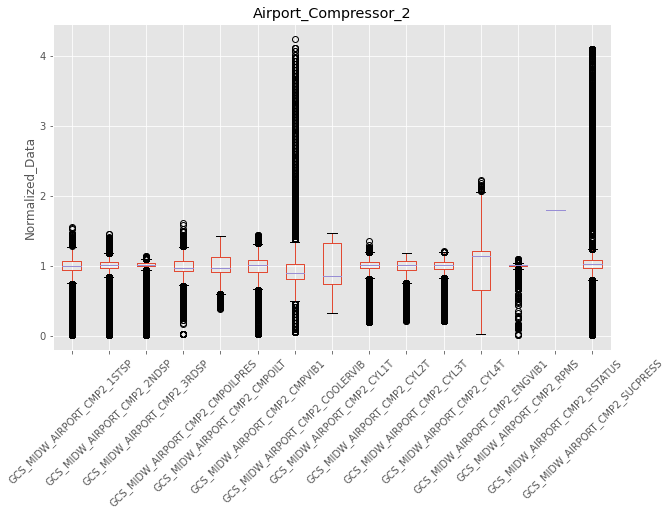

In [80]:
# Create boxplot of compressor data
df1.plot(kind='box', figsize=(10, 6))

plt.title(file_name)
plt.ylabel('Normalized_Data')
plt.xticks(rotation=45)

plt.show()

In [81]:
# Check for empty cells
df1.isna().describe()

GCS_MIDW_AIRPORT_CMP2_1STSP GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                       189164                      189164   
unique                           2                           2   
top                           True                       False   
freq                        128567                      131261   

       GCS_MIDW_AIRPORT_CMP2_3RDSP GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                       189164                           189164   
unique                           2                                2   
top                          False                            False   
freq                        138915                           174260   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                         189164                        189164   
unique                             2                             2   
top                            False                         False   
freq                          105797                        142379   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                           189164                      189164   
unique                               2                           2   
top                              False                       False   
freq                            119800                      122025   

       GCS_MIDW_AIRPORT_CMP2_CYL2T GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                       189164                      189164   
unique                           2                           2   
top                          False                       False   
freq                        123829                      142717   

       GCS_MIDW_AIRPORT_CMP2_CYL4T GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                       189164                        189164   
unique                           2                             2   
top                          False                         False   
freq                        144921                        132347   

       GCS_MIDW_AIRPORT_CMP2_RPMS GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                      189164                        189164   
unique                          2                             2   
top                         False                          True   
freq                       186858                        188828   

       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
count                          189164  
unique                              2  
top                              True  
freq                           100321

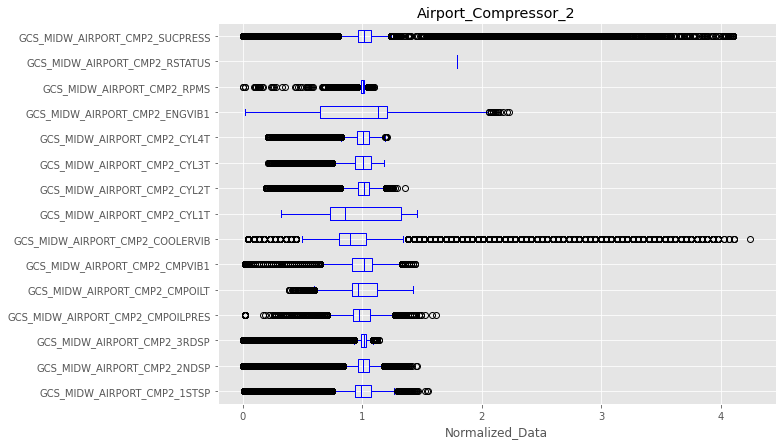

In [82]:
# horizontal box plots
df1.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title(file_name)
plt.xlabel('Normalized_Data')


plt.show()

## SUBPLOTS

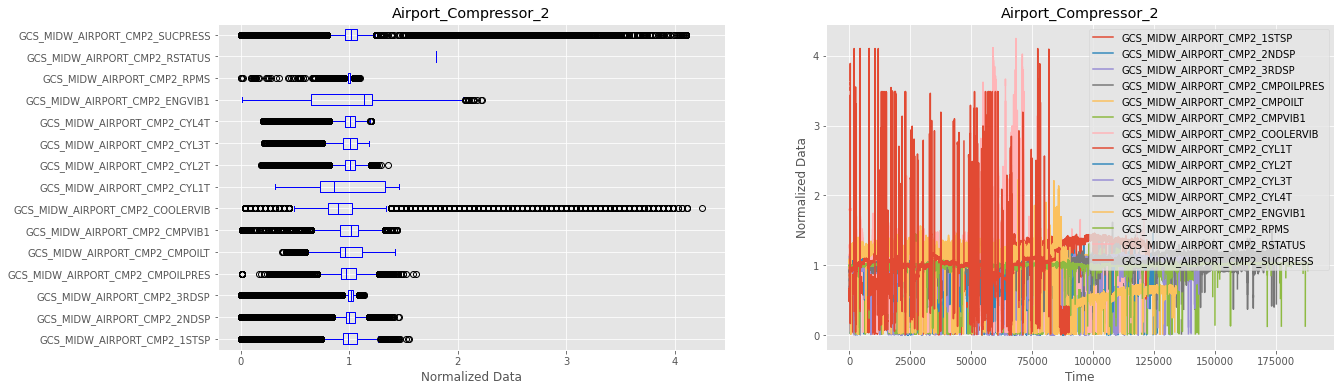

In [83]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df1.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title(file_name)
ax0.set_xlabel('Normalized Data')
#ax0.set_ylabel('Time')

# Subplot 2: Line plot
df1.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title (file_name)
ax1.set_ylabel('Normalized Data')
ax1.set_xlabel('Time')

plt.show()

## SCATTER PLOTS

In [84]:
# Copy new dataframe
df2=df_norm.copy(deep=True)
df2.describe()

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 60597.000000                131261.000000   
mean                      0.993623                     0.999263   
std                       0.141874                     0.111606   
min                       0.007667                     0.002483   
25%                       0.943025                     0.968415   
50%                       0.989026                     1.003178   
75%                       1.073361                     1.052840   
max                       1.548707                     1.457588   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                138915.000000                     174260.000000   
mean                      0.999856                          0.988817   
std                       0.091950                          0.111424   
min                       0.000916                          0.015387   
25%                       0.992487                          0.923214   
50%                       1.014461                          0.969375   
75%                       1.031857                          1.061696   
max                       1.139895                          1.615625   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                  105797.000000                  142379.000000   
mean                        1.000113                       0.992826   
std                         0.110728                       0.148569   
min                         0.382774                       0.016609   
25%                         0.912278                       0.913482   
50%                         0.963315                       1.013135   
75%                         1.122804                       1.079570   
max                         1.422643                       1.444963   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    119800.000000                122025.000000   
mean                          0.980910                     1.000028   
std                           0.399527                     0.305459   
min                           0.044724                     0.318654   
25%                           0.805030                     0.731030   
50%                           0.894477                     0.857554   
75%                           1.028649                     1.326163   
max                           4.248767                     1.462060   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                123829.000000                142717.000000   
mean                      1.000097                     1.000084   
std                       0.096084                     0.095089   
min                       0.192065                     0.213155   
25%                       0.960324                     0.941758   
50%                       1.011280                     1.007643   
75%                       1.054397                     1.069651   
max                       1.360132                     1.182042   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                144921.000000                  132347.000000   
mean                      1.000083                       0.979348   
std                       0.086591                       0.312192   
min                       0.208321                       0.014742   
25%                       0.959766                       0.648629   
50%                       1.008127                       1.135101   
75%                       1.052767                       1.208809   
max                       1.205288                       2.225977   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               186858.000000                   3.360000e+02   
mean                     1.001605                   1.797619e+00   
std                      0.022454           

In [85]:
df2.columns

Index(['Date-Time', 'GCS_MIDW_AIRPORT_CMP2_1STSP', 'Date-Time.1',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'Date-Time.2',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP', 'Date-Time.3',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'Date-Time.4',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT', 'Date-Time.5',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'Date-Time.6',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB', 'Date-Time.7',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'Date-Time.8',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T', 'Date-Time.9',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'Date-Time.10',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T', 'Date-Time.11',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'Date-Time.12',
       'GCS_MIDW_AIRPORT_CMP2_RPMS', 'Date-Time.13',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'Date-Time.14',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

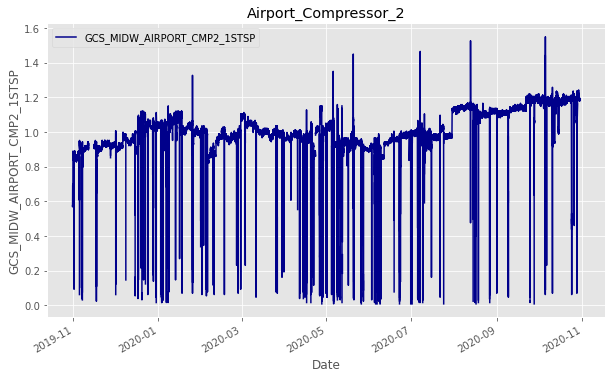

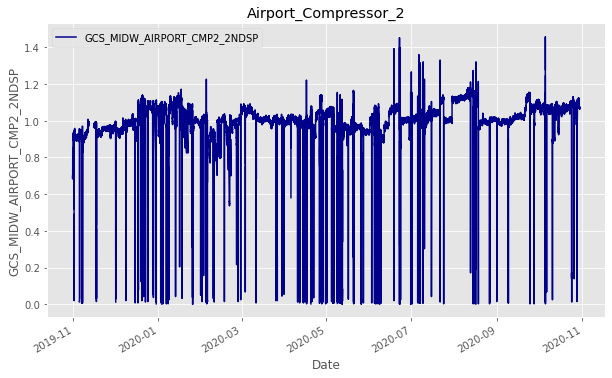

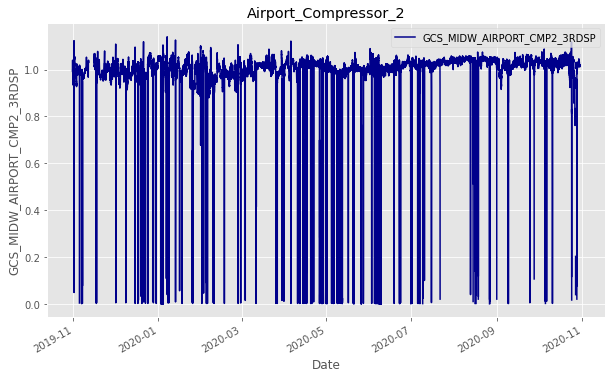

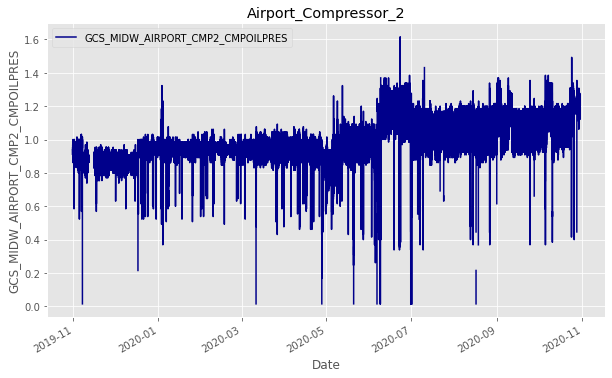

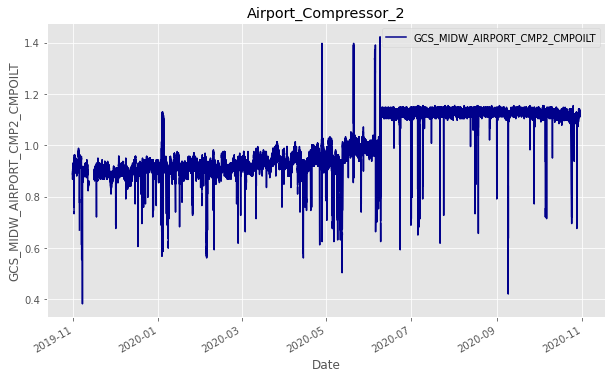

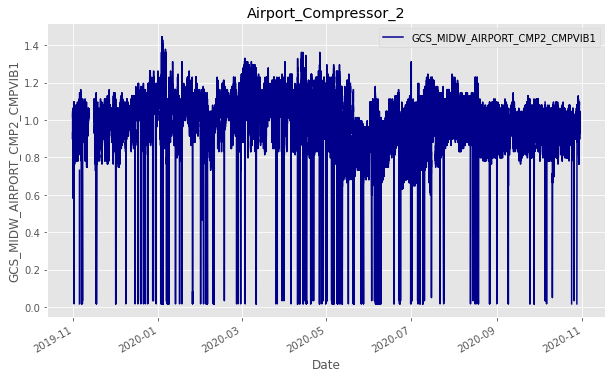

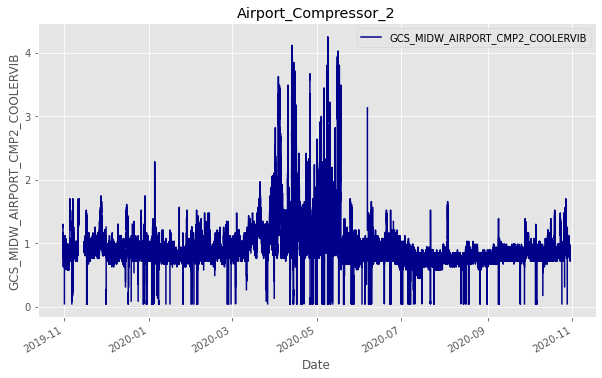

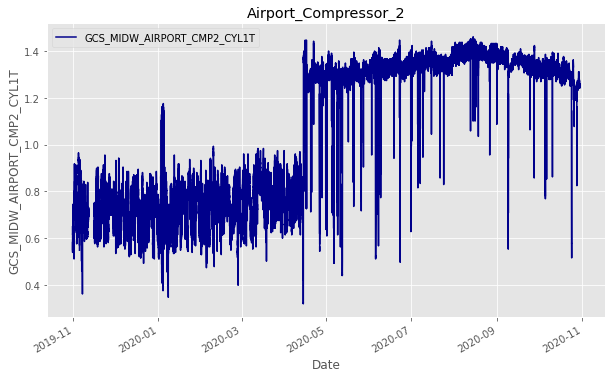

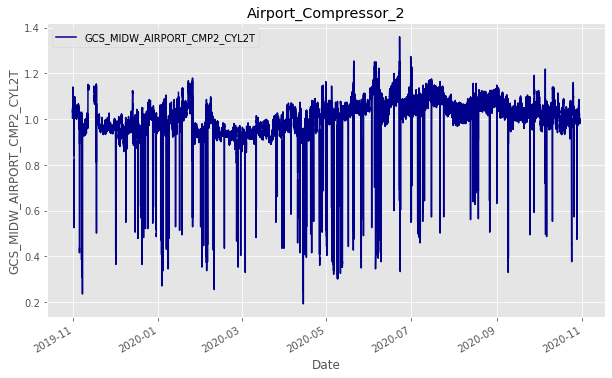

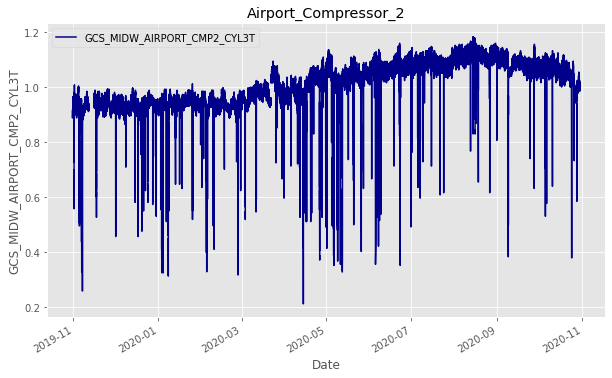

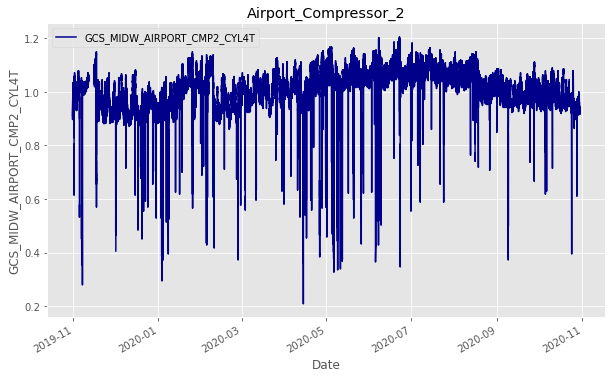

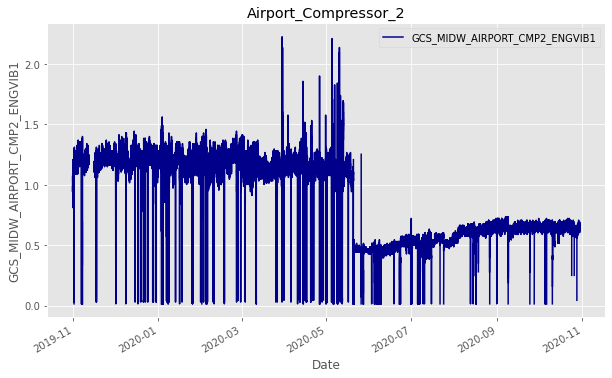

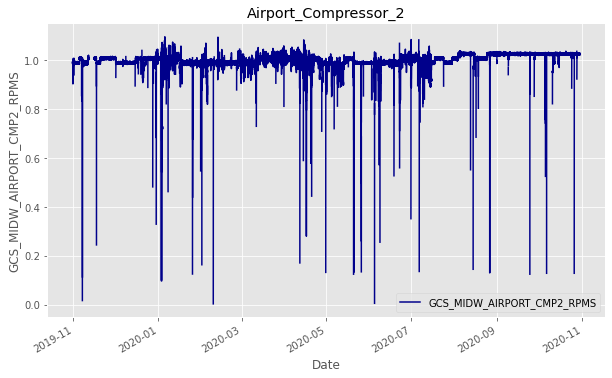

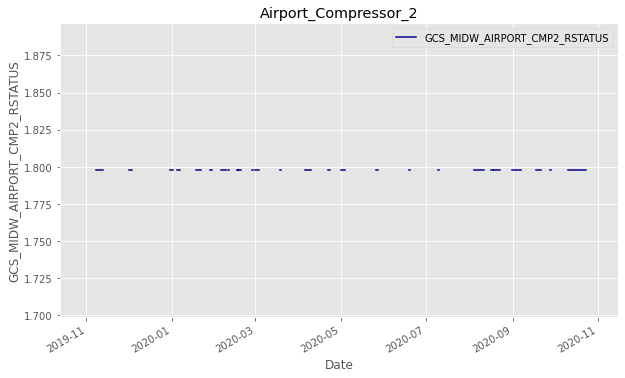

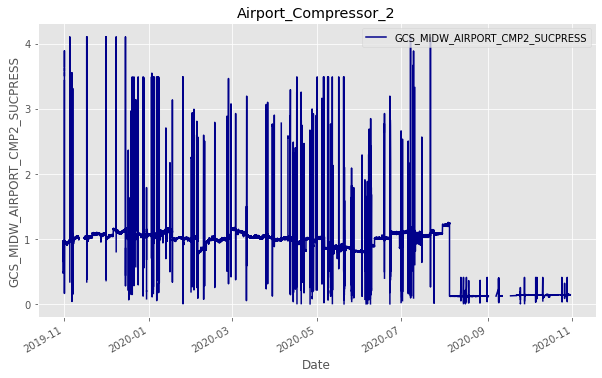

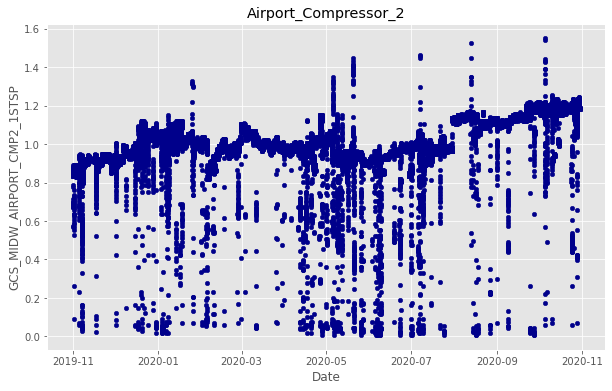

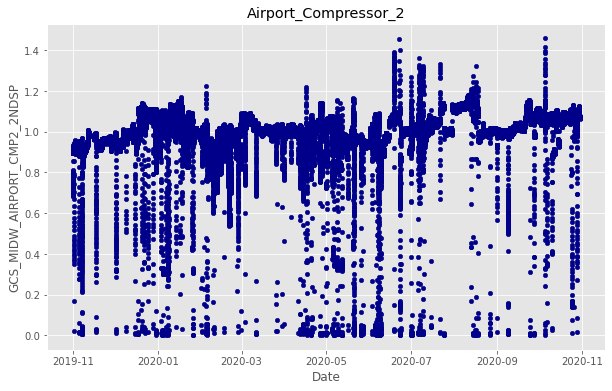

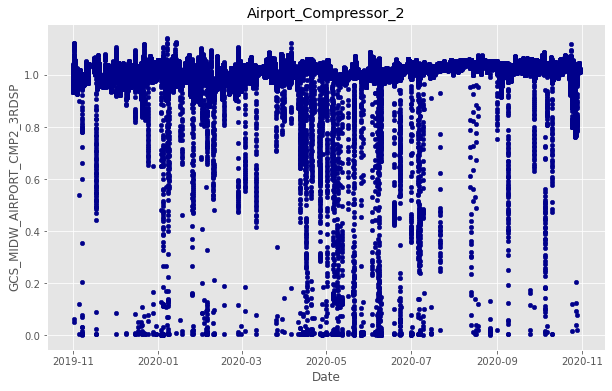

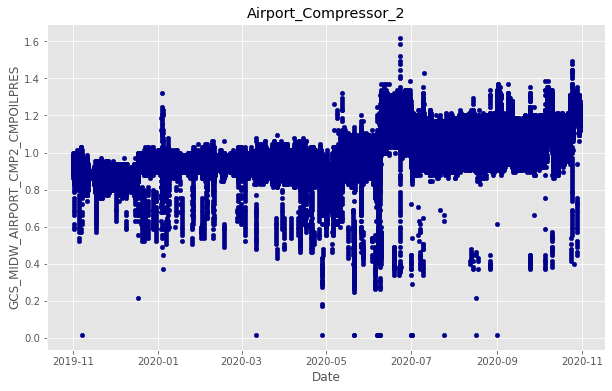

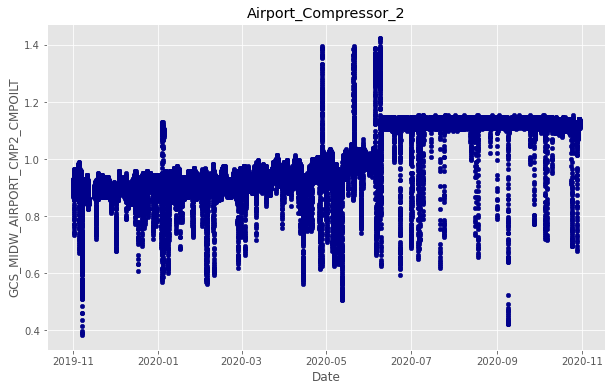

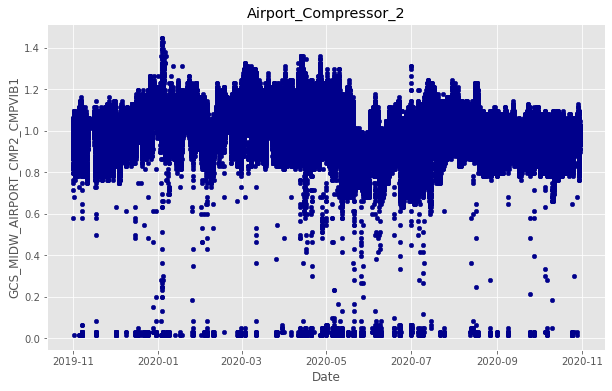

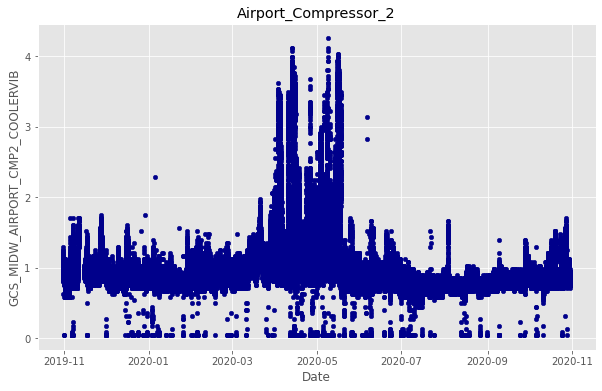

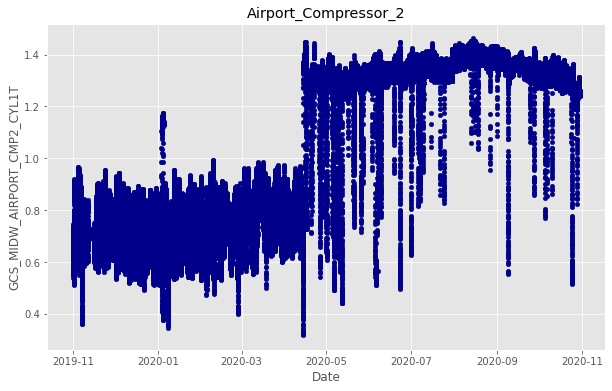

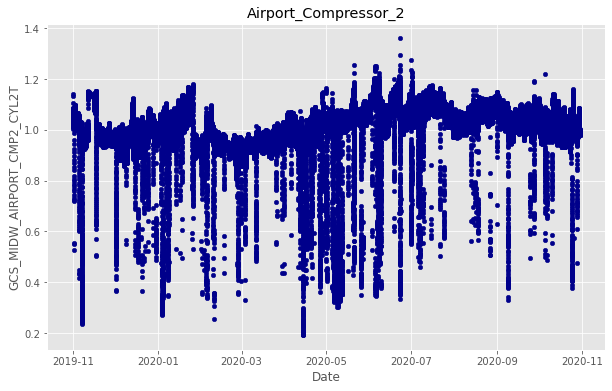

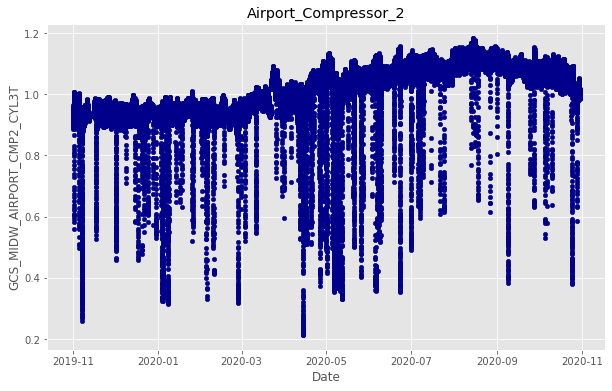

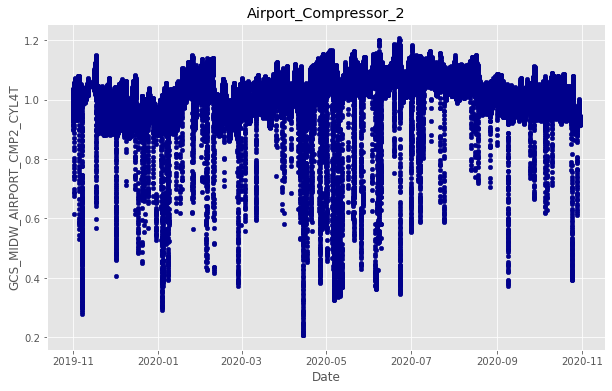

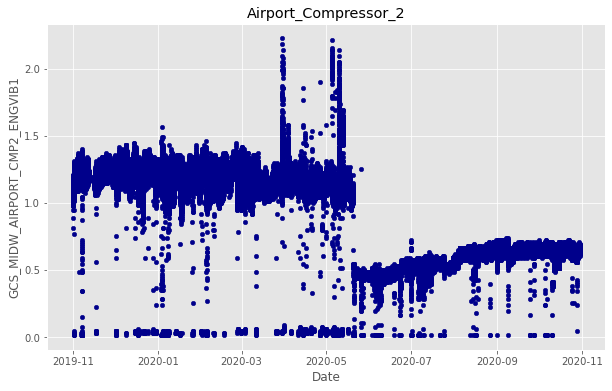

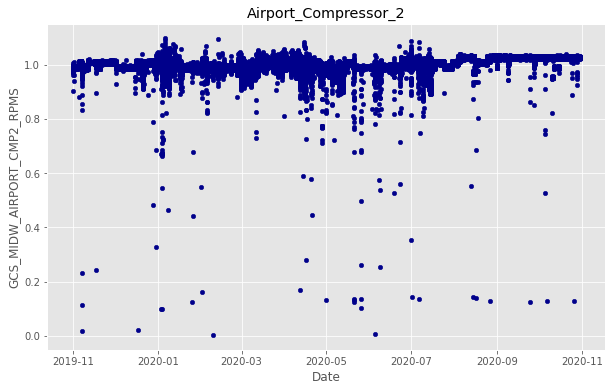

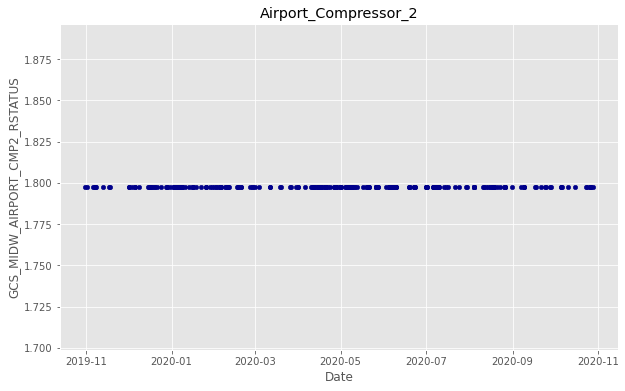

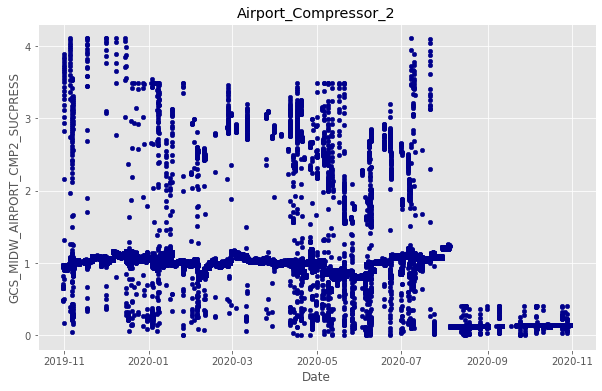

In [88]:
# Plot each signal against its individual time stamp column
n=0
df2_cols=df2.columns
while n < df2.shape[1]:
    df2.plot(kind='line', x= df2_cols[n], y=df2_cols[n+1], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df2_cols[n+1])
    #plt.ylim(0, 2)
    plt.show()
    n=n+2

n=0
df2_cols=df2.columns
while n < df2.shape[1]:
    df2.plot(kind='scatter', x= df2_cols[n], y=df2_cols[n+1], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df2_cols[n+1])
    #plt.ylim(0, 2)
    plt.show()
    n=n+2

## Group data by minute

In [89]:
# Make column list
df2_cols=df2.columns

# Make Data Column list
df2_data_cols = []
n=1
while n < df2.shape[1]:
    df2_data_cols.append(df2_cols[n])
    n=n+2
display(df2_data_cols)

# Make Date Column list
df2_date_cols = []
n=0
while n < df2.shape[1]:
    df2_date_cols.append(df2_cols[n])
    n=n+2
display(df2_date_cols)

['GCS_MIDW_AIRPORT_CMP2_1STSP',
 'GCS_MIDW_AIRPORT_CMP2_2NDSP',
 'GCS_MIDW_AIRPORT_CMP2_3RDSP',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
 'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
 'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
 'GCS_MIDW_AIRPORT_CMP2_CYL1T',
 'GCS_MIDW_AIRPORT_CMP2_CYL2T',
 'GCS_MIDW_AIRPORT_CMP2_CYL3T',
 'GCS_MIDW_AIRPORT_CMP2_CYL4T',
 'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
 'GCS_MIDW_AIRPORT_CMP2_RPMS',
 'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
 'GCS_MIDW_AIRPORT_CMP2_SUCPRESS']

['Date-Time',
 'Date-Time.1',
 'Date-Time.2',
 'Date-Time.3',
 'Date-Time.4',
 'Date-Time.5',
 'Date-Time.6',
 'Date-Time.7',
 'Date-Time.8',
 'Date-Time.9',
 'Date-Time.10',
 'Date-Time.11',
 'Date-Time.12',
 'Date-Time.13',
 'Date-Time.14']

In [90]:
# Create new dataframe with stacked metrics 
df3 = pd.DataFrame({'DateTime':[], 'Metric':[]})

n=0
for col in df2_data_cols:
    col = pd.DataFrame(df2[df2_cols[n:n+2]])
    col.rename(columns={df2_cols[n]:'DateTime'}, inplace=True)
    #col.rename(columns={df2_cols[n]:'DateTime', df2_cols[n+1]:'Data'}, inplace=True)
    col['Metric'] = df2_cols[n+1]
    display(col)
    df3=pd.concat([df3, col])
    n=n+2
display(df3)

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0      2019-10-31 09:25:27                     0.575015   
1      2019-10-31 09:51:27                     0.567348   
2      2019-10-31 09:57:27                     0.682351   
3      2019-10-31 10:05:29                     0.674684   
4      2019-10-31 10:07:27                     0.682351   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_1STSP  
1       GCS_MIDW_AIRPORT_CMP2_1STSP  
2       GCS_MIDW_AIRPORT_CMP2_1STSP  
3       GCS_MIDW_AIRPORT_CMP2_1STSP  
4       GCS_MIDW_AIRPORT_CMP2_1STSP  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_1STSP  
189160  GCS_MIDW_AIRPORT_CMP2_1STSP  
189161  GCS_MIDW_AIRPORT_CMP2_1STSP  
189162  GCS_MIDW_AIRPORT_CMP2_1STSP  
189163  GCS_MIDW_AIRPORT_CMP2_1STSP  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0      2019-10-31 09:31:28                     0.697755   
1      2019-10-31 09:55:27                     0.692789   
2      2019-10-31 10:07:27                     0.690306   
3      2019-10-31 10:21:27                     0.687823   
4      2019-10-31 10:23:27                     0.690306   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_2NDSP  
1       GCS_MIDW_AIRPORT_CMP2_2NDSP  
2       GCS_MIDW_AIRPORT_CMP2_2NDSP  
3       GCS_MIDW_AIRPORT_CMP2_2NDSP  
4       GCS_MIDW_AIRPORT_CMP2_2NDSP  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_2NDSP  
189160  GCS_MIDW_AIRPORT_CMP2_2NDSP  
189161  GCS_MIDW_AIRPORT_CMP2_2NDSP  
189162  GCS_MIDW_AIRPORT_CMP2_2NDSP  
189163  GCS_MIDW_AIRPORT_CMP2_2NDSP  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0      2019-10-31 09:47:27                     0.993402   
1      2019-10-31 09:53:26                     0.996149   
2      2019-10-31 10:01:26                     0.997065   
3      2019-10-31 10:05:29                     0.999811   
4      2019-10-31 10:15:27                     1.002558   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_3RDSP  
1       GCS_MIDW_AIRPORT_CMP2_3RDSP  
2       GCS_MIDW_AIRPORT_CMP2_3RDSP  
3       GCS_MIDW_AIRPORT_CMP2_3RDSP  
4       GCS_MIDW_AIRPORT_CMP2_3RDSP  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_3RDSP  
189160  GCS_MIDW_AIRPORT_CMP2_3RDSP  
189161  GCS_MIDW_AIRPORT_CMP2_3RDSP  
189162  GCS_MIDW_AIRPORT_CMP2_3RDSP  
189163  GCS_MIDW_AIRPORT_CMP2_3RDSP  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0      2019-10-31 09:43:27                          0.938601   
1      2019-10-31 09:51:27                          0.953988   
2      2019-10-31 09:53:26                          0.938601   
3      2019-10-31 10:05:29                          0.923214   
4      2019-10-31 10:07:27                          0.938601   
...                    ...                               ...   
189159                 NaT                               NaN   
189160                 NaT                               NaN   
189161                 NaT                               NaN   
189162                 NaT                               NaN   
189163                 NaT                               NaN   

                                  Metric  
0       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
1       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
2       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
3       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
4       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
...                                  ...  
189159  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
189160  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
189161  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
189162  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
189163  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0      2019-10-31 09:49:27                       0.886760   
1      2019-10-31 09:51:28                       0.893139   
2      2019-10-31 09:53:27                       0.874001   
3      2019-10-31 09:55:27                       0.880380   
4      2019-10-31 09:59:28                       0.874001   
...                    ...                            ...   
189159                 NaT                            NaN   
189160                 NaT                            NaN   
189161                 NaT                            NaN   
189162                 NaT                            NaN   
189163                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
1       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
2       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
3       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
4       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
...                               ...  
189159  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
189160  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
189161  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
189162  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
189163  GCS_MIDW_AIRPORT_CMP2_CMPOILT  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0      2019-10-31 09:45:27                       0.930091   
1      2019-10-31 09:51:28                       0.896873   
2      2019-10-31 09:53:27                       0.930091   
3      2019-10-31 09:55:27                       0.946700   
4      2019-10-31 09:57:27                       0.979917   
...                    ...                            ...   
189159                 NaT                            NaN   
189160                 NaT                            NaN   
189161                 NaT                            NaN   
189162                 NaT                            NaN   
189163                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
1       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
2       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
3       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
4       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
...                               ...  
189159  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
189160  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
189161  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
189162  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
189163  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0      2019-10-31 09:49:27                         1.252268   
1      2019-10-31 09:51:28                         1.207544   
2      2019-10-31 09:53:27                         1.296992   
3      2019-10-31 09:57:27                         1.207544   
4      2019-10-31 09:59:28                         1.252268   
...                    ...                              ...   
189159                 NaT                              NaN   
189160                 NaT                              NaN   
189161                 NaT                              NaN   
189162                 NaT                              NaN   
189163                 NaT                              NaN   

                                 Metric  
0       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
1       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
2       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
3       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
4       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
...                                 ...  
189159  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
189160  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
189161  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
189162  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
189163  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0      2019-10-31 09:49:27                     0.581075   
1      2019-10-31 09:51:28                     0.571703   
2      2019-10-31 09:53:27                     0.590447   
3      2019-10-31 09:55:27                     0.599819   
4      2019-10-31 09:59:28                     0.613878   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL1T  
1       GCS_MIDW_AIRPORT_CMP2_CYL1T  
2       GCS_MIDW_AIRPORT_CMP2_CYL1T  
3       GCS_MIDW_AIRPORT_CMP2_CYL1T  
4       GCS_MIDW_AIRPORT_CMP2_CYL1T  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_CYL1T  
189160  GCS_MIDW_AIRPORT_CMP2_CYL1T  
189161  GCS_MIDW_AIRPORT_CMP2_CYL1T  
189162  GCS_MIDW_AIRPORT_CMP2_CYL1T  
189163  GCS_MIDW_AIRPORT_CMP2_CYL1T  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0      2019-10-31 09:45:27                     1.030878   
1      2019-10-31 09:51:28                     1.038718   
2      2019-10-31 09:55:27                     1.030878   
3      2019-10-31 09:57:27                     1.003441   
4      2019-10-31 10:03:27                     1.011280   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL2T  
1       GCS_MIDW_AIRPORT_CMP2_CYL2T  
2       GCS_MIDW_AIRPORT_CMP2_CYL2T  
3       GCS_MIDW_AIRPORT_CMP2_CYL2T  
4       GCS_MIDW_AIRPORT_CMP2_CYL2T  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_CYL2T  
189160  GCS_MIDW_AIRPORT_CMP2_CYL2T  
189161  GCS_MIDW_AIRPORT_CMP2_CYL2T  
189162  GCS_MIDW_AIRPORT_CMP2_CYL2T  
189163  GCS_MIDW_AIRPORT_CMP2_CYL2T  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0      2019-10-31 09:49:27                     0.891376   
1      2019-10-31 09:51:28                     0.903003   
2      2019-10-31 09:53:27                     0.895252   
3      2019-10-31 09:55:27                     0.899127   
4      2019-10-31 09:57:27                     0.887501   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL3T  
1       GCS_MIDW_AIRPORT_CMP2_CYL3T  
2       GCS_MIDW_AIRPORT_CMP2_CYL3T  
3       GCS_MIDW_AIRPORT_CMP2_CYL3T  
4       GCS_MIDW_AIRPORT_CMP2_CYL3T  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_CYL3T  
189160  GCS_MIDW_AIRPORT_CMP2_CYL3T  
189161  GCS_MIDW_AIRPORT_CMP2_CYL3T  
189162  GCS_MIDW_AIRPORT_CMP2_CYL3T  
189163  GCS_MIDW_AIRPORT_CMP2_CYL3T  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL4T  \
0      2019-10-31 09:49:27                     0.911406   
1      2019-10-31 09:55:27                     0.915126   
2      2019-10-31 09:57:27                     0.896526   
3      2019-10-31 09:59:28                     0.900246   
4      2019-10-31 10:01:27                     0.915126   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL4T  
1       GCS_MIDW_AIRPORT_CMP2_CYL4T  
2       GCS_MIDW_AIRPORT_CMP2_CYL4T  
3       GCS_MIDW_AIRPORT_CMP2_CYL4T  
4       GCS_MIDW_AIRPORT_CMP2_CYL4T  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_CYL4T  
189160  GCS_MIDW_AIRPORT_CMP2_CYL4T  
189161  GCS_MIDW_AIRPORT_CMP2_CYL4T  
189162  GCS_MIDW_AIRPORT_CMP2_CYL4T  
189163  GCS_MIDW_AIRPORT_CMP2_CYL4T  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
0      2019-10-31 09:49:27                       0.987685   
1      2019-10-31 09:51:28                       0.943461   
2      2019-10-31 09:53:27                       1.002427   
3      2019-10-31 09:59:28                       1.061393   
4      2019-10-31 10:01:27                       1.002427   
...                    ...                            ...   
189159                 NaT                            NaN   
189160                 NaT                            NaN   
189161                 NaT                            NaN   
189162                 NaT                            NaN   
189163                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
1       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
2       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
3       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
4       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
...                               ...  
189159  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
189160  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
189161  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
189162  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
189163  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_RPMS  \
0      2019-10-31 09:49:27                    0.989901   
1      2019-10-31 09:51:27                    0.986176   
2      2019-10-31 09:53:26                    0.989156   
3      2019-10-31 09:55:27                    0.991390   
4      2019-10-31 09:57:27                    0.984687   
...                    ...                         ...   
189159 2020-10-30 09:39:32                    1.024908   
189160 2020-10-30 09:41:36                    1.027888   
189161 2020-10-30 09:43:31                    1.027143   
189162 2020-10-30 09:45:32                    1.025653   
189163 2020-10-30 09:53:40                    1.027888   

                            Metric  
0       GCS_MIDW_AIRPORT_CMP2_RPMS  
1       GCS_MIDW_AIRPORT_CMP2_RPMS  
2       GCS_MIDW_AIRPORT_CMP2_RPMS  
3       GCS_MIDW_AIRPORT_CMP2_RPMS  
4       GCS_MIDW_AIRPORT_CMP2_RPMS  
...                            ...  
189159  GCS_MIDW_AIRPORT_CMP2_RPMS  
189160  GCS_MIDW_AIRPORT_CMP2_RPMS  
189161  GCS_MIDW_AIRPORT_CMP2_RPMS  
189162  GCS_MIDW_AIRPORT_CMP2_RPMS  
189163  GCS_MIDW_AIRPORT_CMP2_RPMS  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
0      2019-10-31 05:43:27                       1.797619   
1      2019-11-01 10:43:27                            NaN   
2      2019-11-01 11:35:20                       1.797619   
3      2019-11-05 07:25:10                            NaN   
4      2019-11-05 09:12:58                       1.797619   
...                    ...                            ...   
189159                 NaT                            NaN   
189160                 NaT                            NaN   
189161                 NaT                            NaN   
189162                 NaT                            NaN   
189163                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
1       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
2       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
3       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
4       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
...                               ...  
189159  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
189160  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
189161  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
189162  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
189163  GCS_MIDW_AIRPORT_CMP2_RSTATUS  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  \
0      2019-10-31 09:47:27                        0.484283   
1      2019-10-31 09:51:27                        0.488387   
2      2019-10-31 09:53:26                        0.480179   
3      2019-10-31 09:57:27                        0.673071   
4      2019-10-31 09:59:27                        0.664863   
...                    ...                             ...   
189159                 NaT                             NaN   
189160                 NaT                             NaN   
189161                 NaT                             NaN   
189162                 NaT                             NaN   
189163                 NaT                             NaN   

                                Metric  
0       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
1       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
2       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
3       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
4       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
...                                ...  
189159  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
189160  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
189161  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
189162  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
189163  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  

[189164 rows x 3 columns]

DateTime                          Metric  \
0      2019-10-31 09:25:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
1      2019-10-31 09:51:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
2      2019-10-31 09:57:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
3      2019-10-31 10:05:29     GCS_MIDW_AIRPORT_CMP2_1STSP   
4      2019-10-31 10:07:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
...                    ...                             ...   
189159                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189160                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189161                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189162                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189163                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   

        GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                          0.575015                          NaN   
1                          0.567348                          NaN   
2                          0.682351                          NaN   
3                          0.674684                          NaN   
4                          0.682351                          NaN   
...                             ...                          ...   
189159                          NaN                          NaN   
189160                          NaN                          NaN   
189161                          NaN                          NaN   
189162                          NaN                          NaN   
189163                          NaN                          NaN   

        GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4                               NaN                               NaN   
...                             ...                               ...   
189159                          NaN                               NaN   
189160                          NaN                               NaN   
189161                          NaN                               NaN   
189162                          NaN                               NaN   
189163                          NaN                               NaN   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
189159                            NaN                            NaN   
189160                            NaN                            NaN   
189161                            NaN                            NaN   
189162                            NaN                            NaN   
189163                            NaN                            NaN   

        GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
...                                 ...                          ...   
189159                              NaN                          NaN   
189160                              NaN                          NaN   
189161                              NaN                          N

In [91]:
# Round datetime to nearest minute
df3['DateTime'] = df3['DateTime'].values.astype('<M8[m]')
display(df3)

DateTime                          Metric  \
0      2019-10-31 09:25:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
1      2019-10-31 09:51:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
2      2019-10-31 09:57:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
3      2019-10-31 10:05:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
4      2019-10-31 10:07:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
...                    ...                             ...   
189159                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189160                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189161                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189162                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189163                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   

        GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                          0.575015                          NaN   
1                          0.567348                          NaN   
2                          0.682351                          NaN   
3                          0.674684                          NaN   
4                          0.682351                          NaN   
...                             ...                          ...   
189159                          NaN                          NaN   
189160                          NaN                          NaN   
189161                          NaN                          NaN   
189162                          NaN                          NaN   
189163                          NaN                          NaN   

        GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4                               NaN                               NaN   
...                             ...                               ...   
189159                          NaN                               NaN   
189160                          NaN                               NaN   
189161                          NaN                               NaN   
189162                          NaN                               NaN   
189163                          NaN                               NaN   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
189159                            NaN                            NaN   
189160                            NaN                            NaN   
189161                            NaN                            NaN   
189162                            NaN                            NaN   
189163                            NaN                            NaN   

        GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
...                                 ...                          ...   
189159                              NaN                          NaN   
189160                              NaN                          NaN   
189161                              NaN                          N

In [92]:
df3.describe()

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 60597.000000                131261.000000   
mean                      0.993623                     0.999263   
std                       0.141874                     0.111606   
min                       0.007667                     0.002483   
25%                       0.943025                     0.968415   
50%                       0.989026                     1.003178   
75%                       1.073361                     1.052840   
max                       1.548707                     1.457588   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                138915.000000                     174260.000000   
mean                      0.999856                          0.988817   
std                       0.091950                          0.111424   
min                       0.000916                          0.015387   
25%                       0.992487                          0.923214   
50%                       1.014461                          0.969375   
75%                       1.031857                          1.061696   
max                       1.139895                          1.615625   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                  105797.000000                  142379.000000   
mean                        1.000113                       0.992826   
std                         0.110728                       0.148569   
min                         0.382774                       0.016609   
25%                         0.912278                       0.913482   
50%                         0.963315                       1.013135   
75%                         1.122804                       1.079570   
max                         1.422643                       1.444963   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    119800.000000                122025.000000   
mean                          0.980910                     1.000028   
std                           0.399527                     0.305459   
min                           0.044724                     0.318654   
25%                           0.805030                     0.731030   
50%                           0.894477                     0.857554   
75%                           1.028649                     1.326163   
max                           4.248767                     1.462060   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                123829.000000                142717.000000   
mean                      1.000097                     1.000084   
std                       0.096084                     0.095089   
min                       0.192065                     0.213155   
25%                       0.960324                     0.941758   
50%                       1.011280                     1.007643   
75%                       1.054397                     1.069651   
max                       1.360132                     1.182042   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                144921.000000                  132347.000000   
mean                      1.000083                       0.979348   
std                       0.086591                       0.312192   
min                       0.208321                       0.014742   
25%                       0.959766                       0.648629   
50%                       1.008127                       1.135101   
75%                       1.052767                       1.208809   
max                       1.205288                       2.225977   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               186858.000000                   3.360000e+02   
mean                     1.001605                   1.797619e+00   
std                      0.022454           

In [93]:
# Drop rows without datetime data
df3.dropna(subset=['DateTime'], inplace=True)
display(df3)

DateTime                          Metric  \
0     2019-10-31 09:25:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
1     2019-10-31 09:51:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
2     2019-10-31 09:57:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
3     2019-10-31 10:05:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
4     2019-10-31 10:07:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
...                   ...                             ...   
90100 2020-10-30 07:07:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
90101 2020-10-30 07:09:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
90102 2020-10-30 07:13:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
90103 2020-10-30 07:17:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
90104 2020-10-30 09:45:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   

       GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                         0.575015                          NaN   
1                         0.567348                          NaN   
2                         0.682351                          NaN   
3                         0.674684                          NaN   
4                         0.682351                          NaN   
...                            ...                          ...   
90100                          NaN                          NaN   
90101                          NaN                          NaN   
90102                          NaN                          NaN   
90103                          NaN                          NaN   
90104                          NaN                          NaN   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                              NaN                               NaN   
1                              NaN                               NaN   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                              NaN                               NaN   
...                            ...                               ...   
90100                          NaN                               NaN   
90101                          NaN                               NaN   
90102                          NaN                               NaN   
90103                          NaN                               NaN   
90104                          NaN                               NaN   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                                NaN                            NaN   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
...                              ...                            ...   
90100                            NaN                            NaN   
90101                            NaN                            NaN   
90102                            NaN                            NaN   
90103                            NaN                            NaN   
90104                            NaN                            NaN   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   
...                                ...                          ...   
90100                              NaN                          NaN   
90101                              NaN                          NaN   
90102                              NaN                          NaN   
90103                              NaN             

In [94]:
# Group by datetime to nearest minute
df_min = df3.groupby(['DateTime'], as_index=False).mean()
display(df_min)

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0      2019-10-31 05:43:00                          NaN   
1      2019-10-31 09:25:00                     0.575015   
2      2019-10-31 09:31:00                          NaN   
3      2019-10-31 09:43:00                          NaN   
4      2019-10-31 09:45:00                          NaN   
...                    ...                          ...   
222392 2020-10-30 09:39:00                          NaN   
222393 2020-10-30 09:41:00                          NaN   
222394 2020-10-30 09:43:00                          NaN   
222395 2020-10-30 09:45:00                     1.180698   
222396 2020-10-30 09:53:00                          NaN   

        GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                          0.697755                          NaN   
3                               NaN                          NaN   
4                               NaN                          NaN   
...                             ...                          ...   
222392                     1.072705                          NaN   
222393                     1.075188                          NaN   
222394                     1.072705                     1.016292   
222395                     1.070222                     1.015376   
222396                          NaN                     1.014461   

        GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0                                    NaN                            NaN   
1                                    NaN                            NaN   
2                                    NaN                            NaN   
3                               0.938601                            NaN   
4                                    NaN                            NaN   
...                                  ...                            ...   
222392                          1.215565                            NaN   
222393                          1.184791                       1.122804   
222394                          1.230952                       1.116424   
222395                          1.123244                       1.122804   
222396                          1.154018                       1.116424   

        GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                            0.930091                              NaN   
...                               ...                              ...   
222392                       1.029744                         0.805030   
222393                            NaN                              NaN   
222394                            NaN                         0.849753   
222395                            NaN                              NaN   
222396                       1.013135                              NaN   

        GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                               NaN                          NaN   
3                               NaN                          NaN   
4                               NaN                     1.030878   
...                             ...                          ...   
222392                     1.251186                          NaN   
222393                     1.255872                     0.995601   
222394                          NaN                     0.999521   
222395                

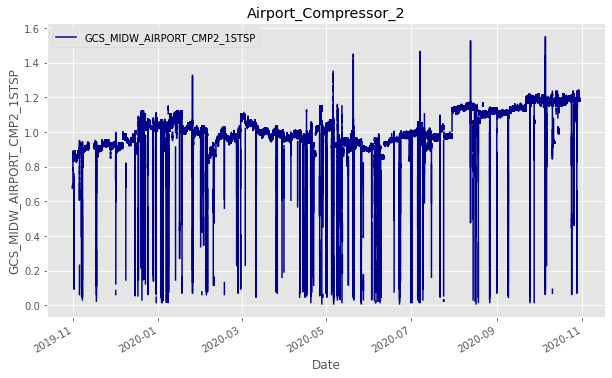

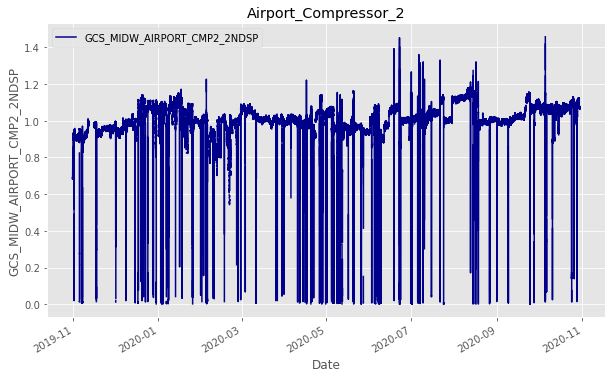

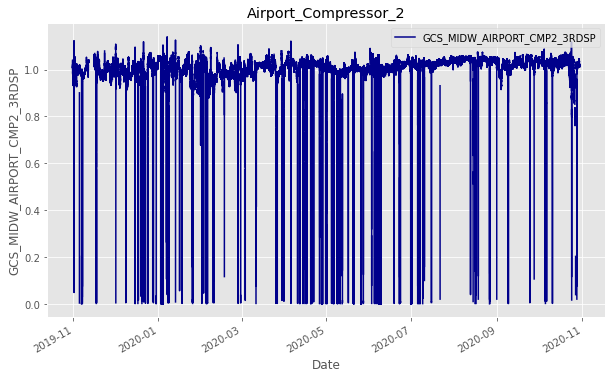

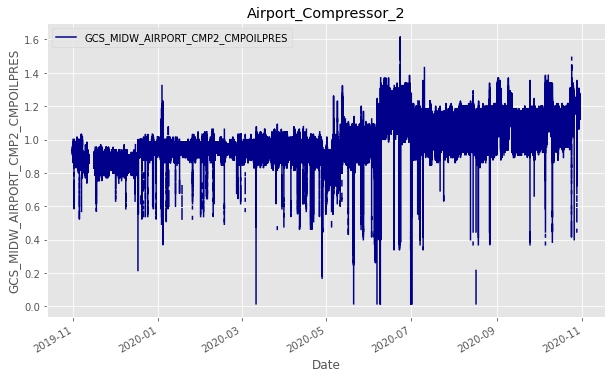

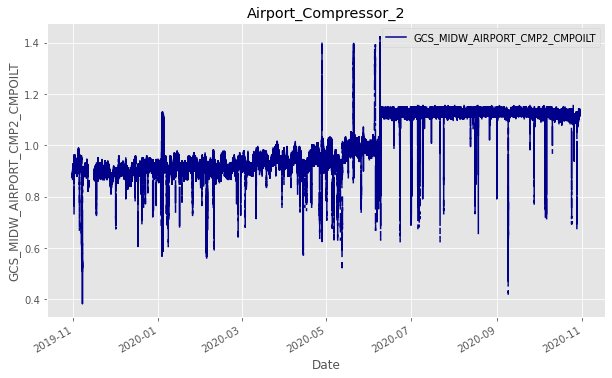

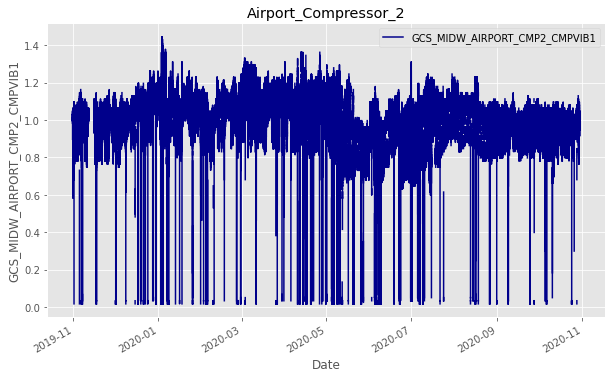

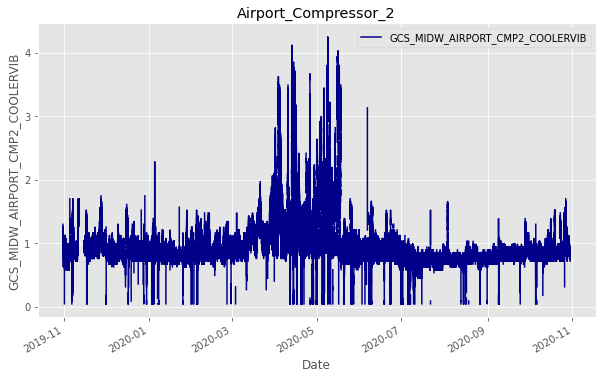

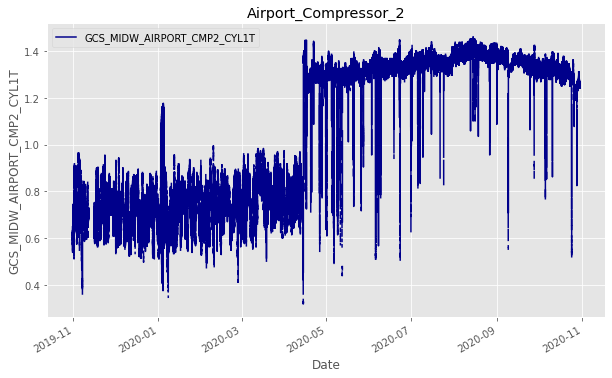

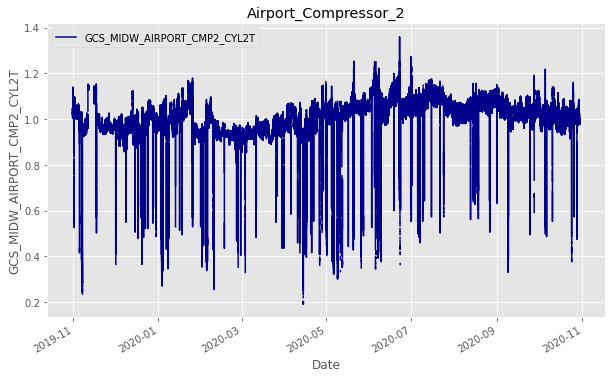

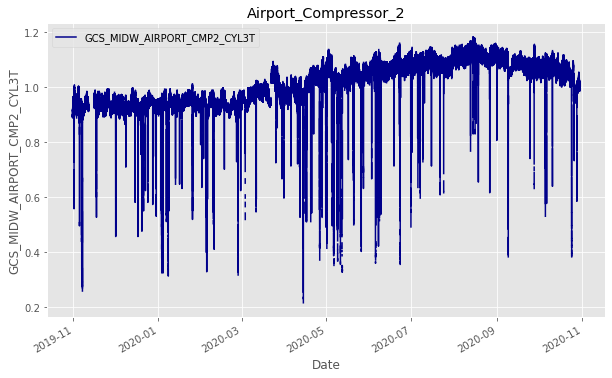

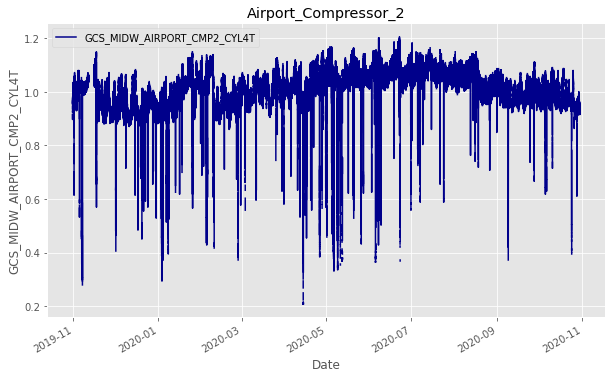

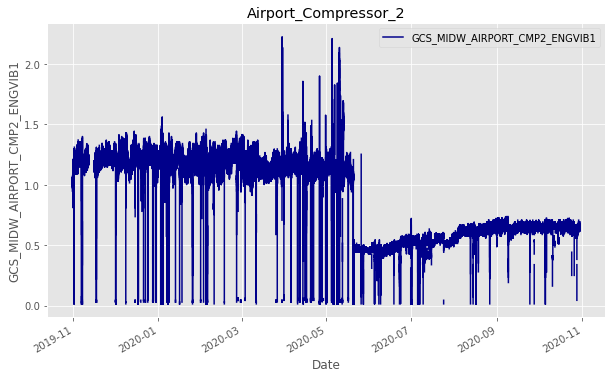

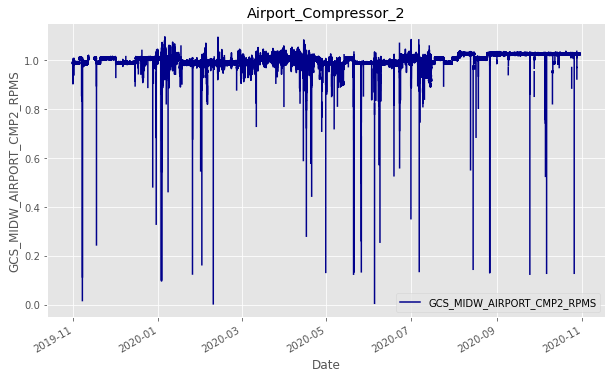

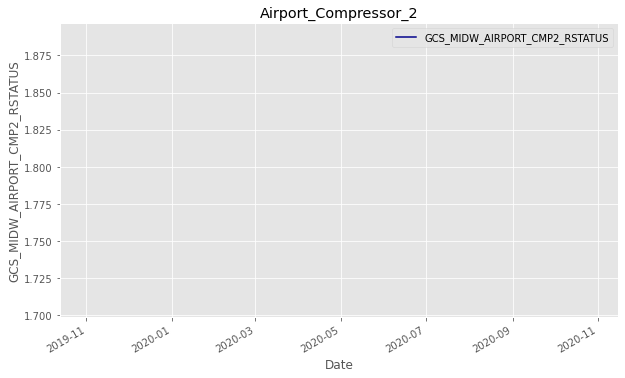

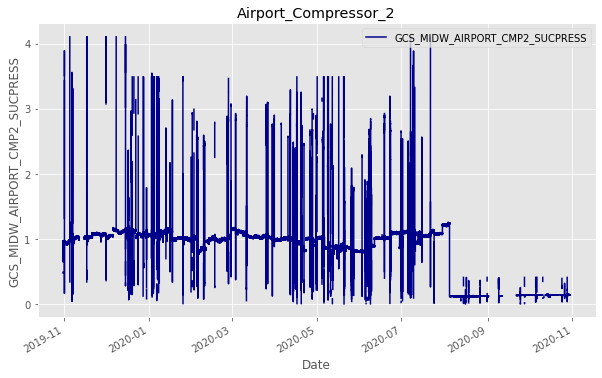

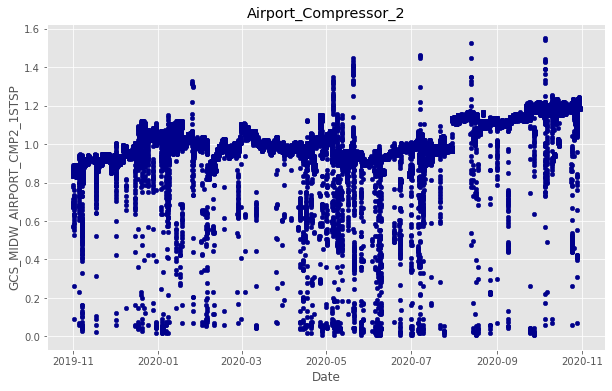

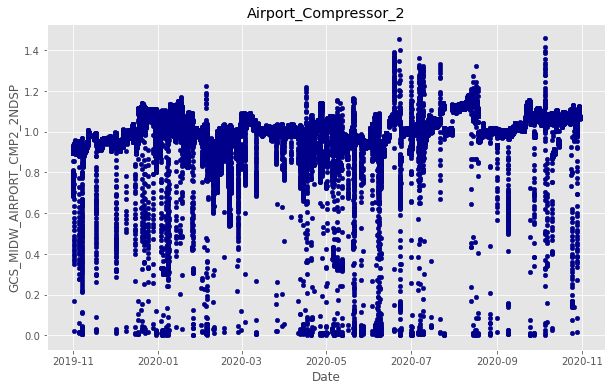

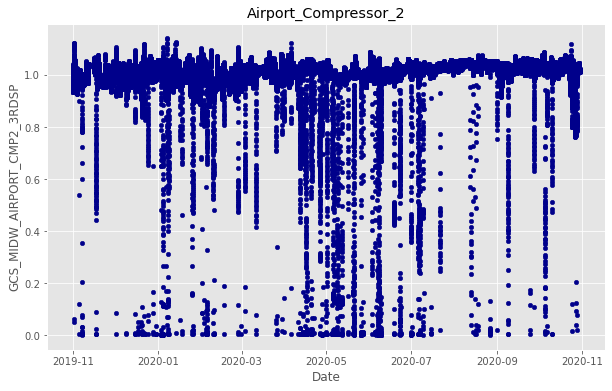

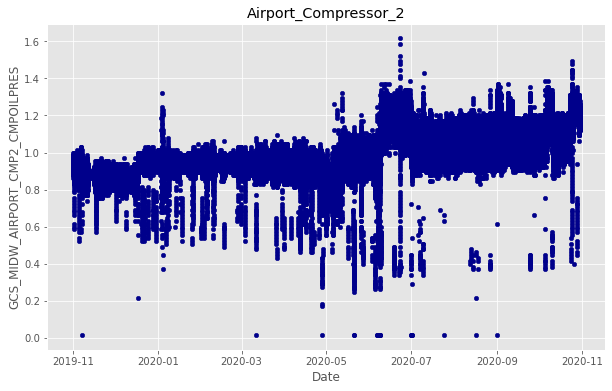

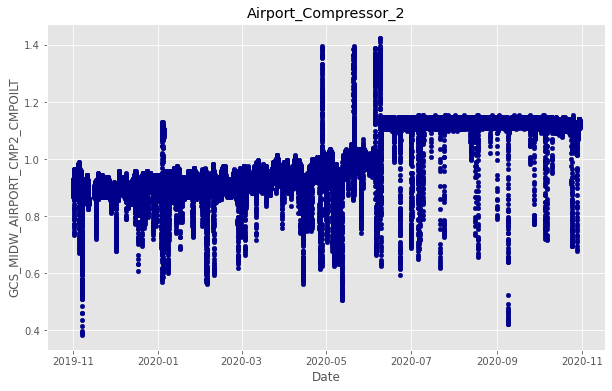

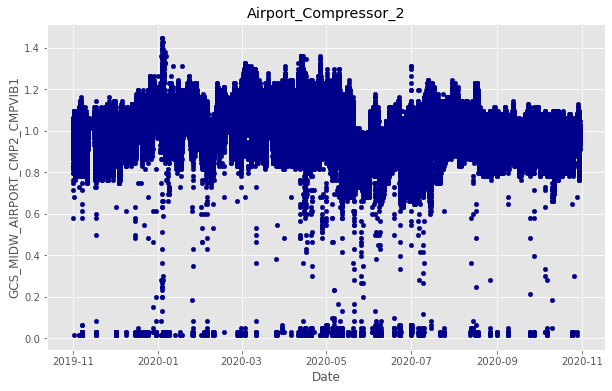

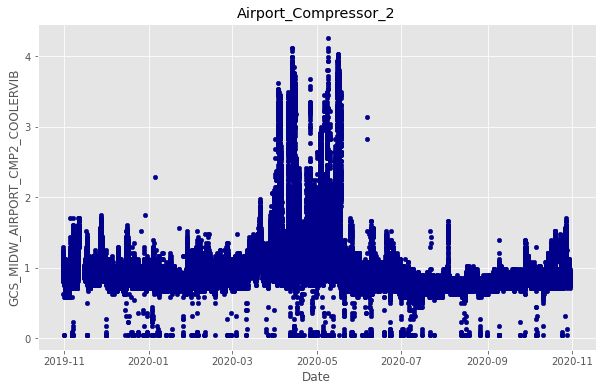

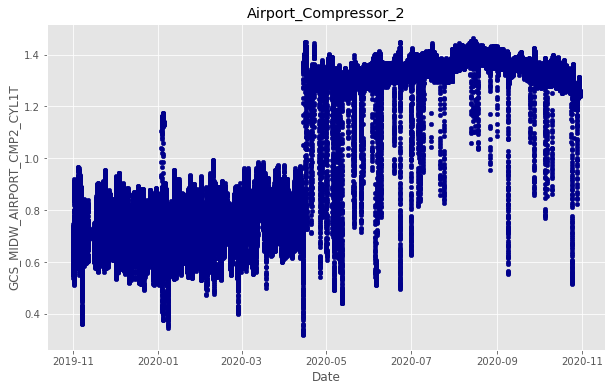

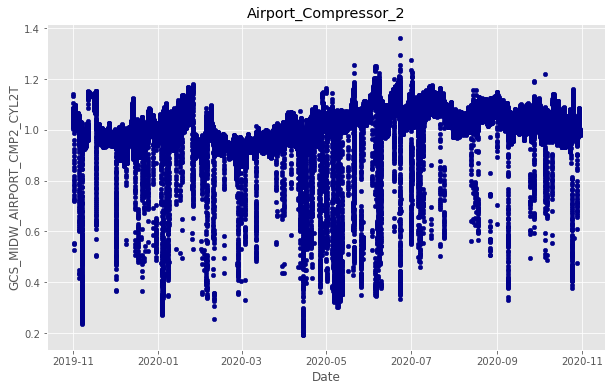

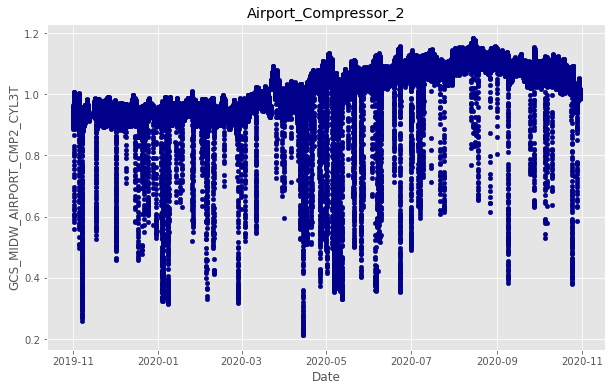

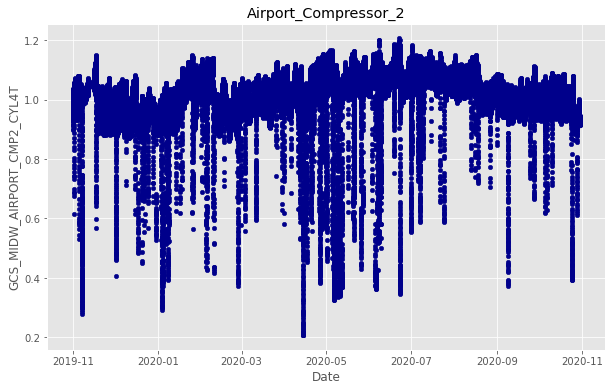

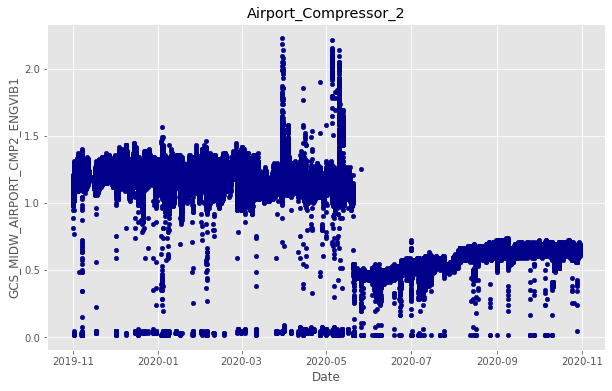

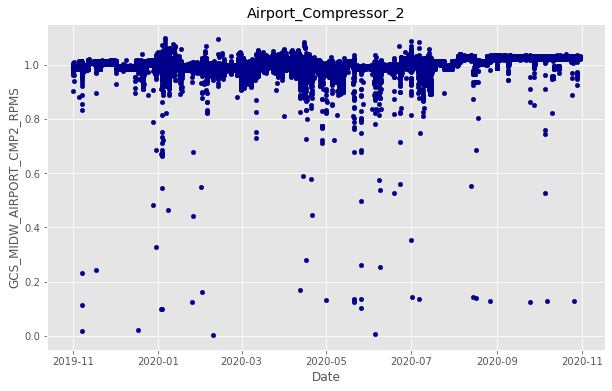

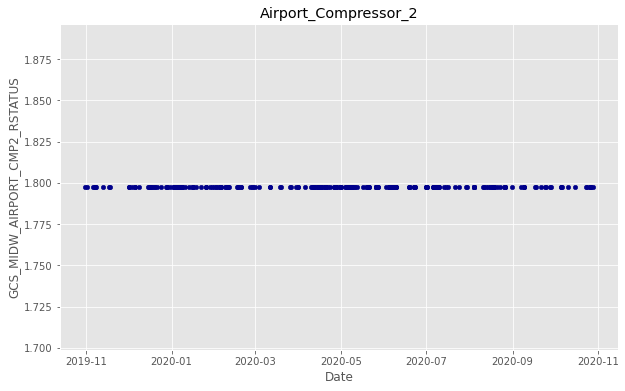

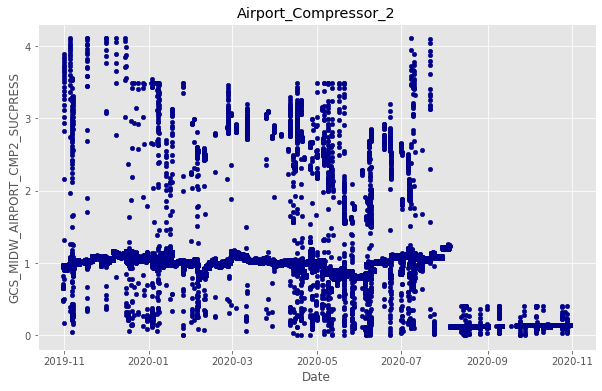

In [96]:
n=1
df_min_cols=df_min.columns
while n < df_min.shape[1]:
    df_min.plot(kind='line', x= df_min_cols[0], y=df_min_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_min_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

n=1
df_min_cols=df_min.columns
while n < df_min.shape[1]:
    df_min.plot(kind='scatter', x= df_min_cols[0], y=df_min_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_min_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

## Group by hour

In [97]:
# Group by datetime to nearest hour
df_hour = df_min.copy(deep=True)
df_hour['DateTime'] = df_hour['DateTime'].dt.round('H')
df_hour = df_hour.groupby(['DateTime'], as_index=False).mean()
display(df_hour.describe())
display(df_hour)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                  7912.000000                  8621.000000   
mean                      1.000612                     0.997386   
std                       0.124810                     0.103222   
min                       0.007667                     0.002483   
25%                       0.939191                     0.965740   
50%                       0.992093                     1.004201   
75%                       1.091673                     1.054147   
max                       1.239477                     1.260745   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                  8586.000000                       8625.000000   
mean                      0.998848                          0.983608   
std                       0.081047                          0.098178   
min                       0.002075                          0.015387   
25%                       0.989687                          0.932683   
50%                       1.014207                          0.950911   
75%                       1.032118                          1.044211   
max                       1.097778                          1.360971   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                    8649.000000                    8642.000000   
mean                        1.002120                       0.983797   
std                         0.108969                       0.159944   
min                         0.438450                       0.016609   
25%                         0.912916                       0.916804   
50%                         0.961401                       1.012236   
75%                         1.123785                       1.078532   
max                         1.381176                       1.348632   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                      8629.000000                  8651.000000   
mean                          0.939799                     1.058848   
std                           0.351716                     0.305731   
min                           0.044724                     0.325215   
25%                           0.781352                     0.754093   
50%                           0.860074                     1.268128   
75%                           0.977536                     1.339405   
max                           3.852351                     1.449563   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                  8653.000000                  8653.000000   
mean                      1.002262                     1.004499   
std                       0.085880                     0.091206   
min                       0.196376                     0.215093   
25%                       0.959086                     0.942000   
50%                       1.010496                     1.019054   
75%                       1.052045                     1.072696   
max                       1.200265                     1.174887   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                  8652.000000                    8619.000000   
mean                      1.003860                       0.897562   
std                       0.081953                       0.324567   
min                       0.210925                       0.014742   
25%                       0.963043                       0.608380   
50%                       1.013015                       1.071528   
75%                       1.054212                       1.195753   
max                       1.183117                       2.055712   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                 8563.000000                   2.720000e+02   
mean                     1.000942                   1.797619e+00   
std                      0.023279           

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0    2019-10-31 06:00:00                          NaN   
1    2019-10-31 09:00:00                     0.575015   
2    2019-10-31 10:00:00                     0.667784   
3    2019-10-31 11:00:00                     0.683373   
4    2019-10-31 12:00:00                          NaN   
...                  ...                          ...   
8659 2020-10-30 06:00:00                     1.184105   
8660 2020-10-30 07:00:00                          NaN   
8661 2020-10-30 08:00:00                          NaN   
8662 2020-10-30 09:00:00                     1.185079   
8663 2020-10-30 10:00:00                     1.183253   

      GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                        0.691796                     1.007289   
3                        0.690927                     1.018306   
4                        0.748113                     0.993540   
...                           ...                          ...   
8659                     1.068868                     1.019413   
8660                     1.067429                     1.019588   
8661                     1.068981                     1.018947   
8662                     1.070222                     1.017970   
8663                     1.072705                     1.016109   

      GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0                                  NaN                            NaN   
1                                  NaN                            NaN   
2                             0.932831                       0.879890   
3                             0.933867                       0.888355   
4                             0.933742                       0.895266   
...                                ...                            ...   
8659                          1.183253                       1.126791   
8660                          1.182227                       1.128272   
8661                          1.185945                       1.123867   
8662                          1.175000                       1.120677   
8663                          1.182868                       1.118551   

      GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                          0.981871                         1.185182   
3                          1.021800                         1.081504   
4                          1.007945                         0.971402   
...                             ...                              ...   
8659                       0.939034                         0.780183   
8660                       0.974381                         0.810620   
8661                       0.978452                         0.780635   
8662                       1.009444                         0.822919   
8663                       1.019778                         0.849753   

      GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                        0.602319                     1.023642   
3                        0.605068                     1.036851   
4                        0.582463                     1.041331   
...                           ...                          ...   
8659                     1.253763                     0.991290   
8660                     1.249936                     0.987762   
8661                     1.250453                     0.983320   
8662                     1.251186                     0.990842   
8663                     1.254700                     0.999521   

   

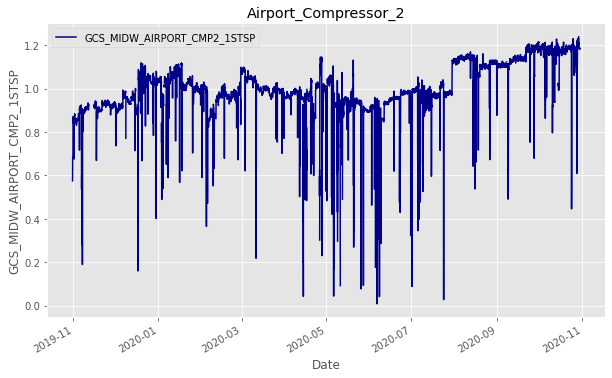

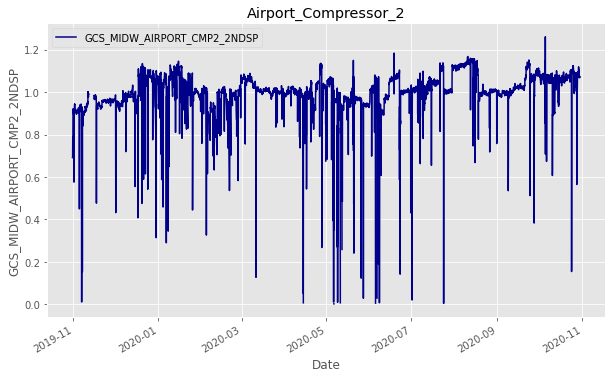

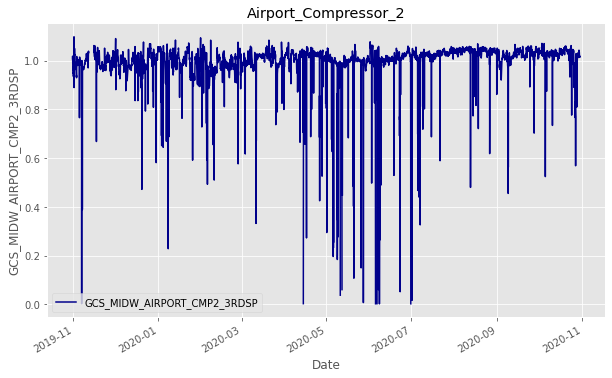

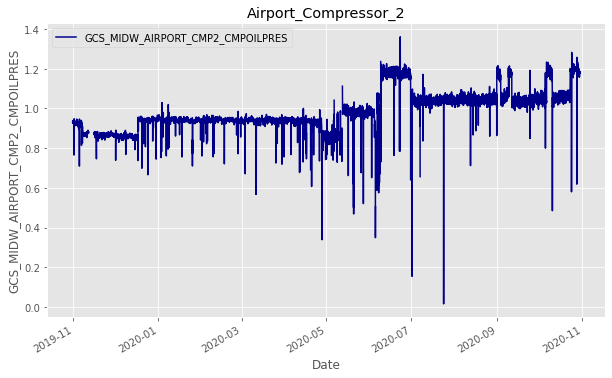

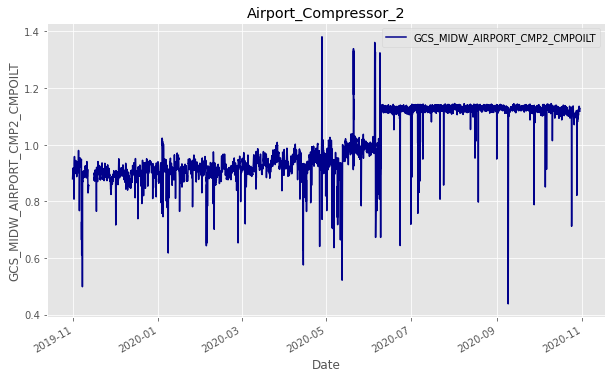

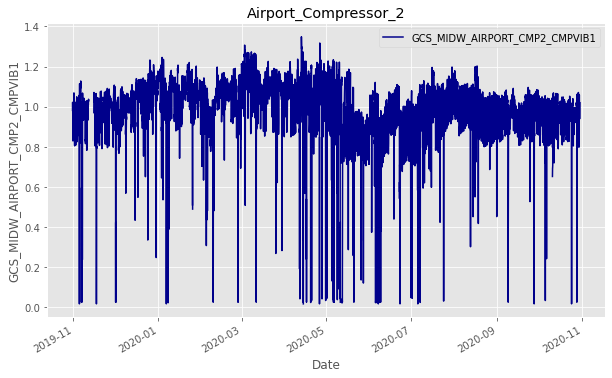

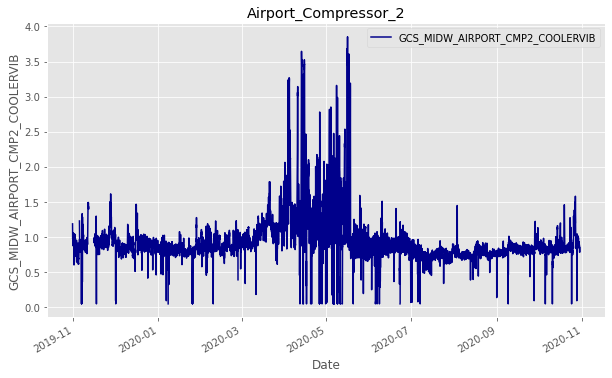

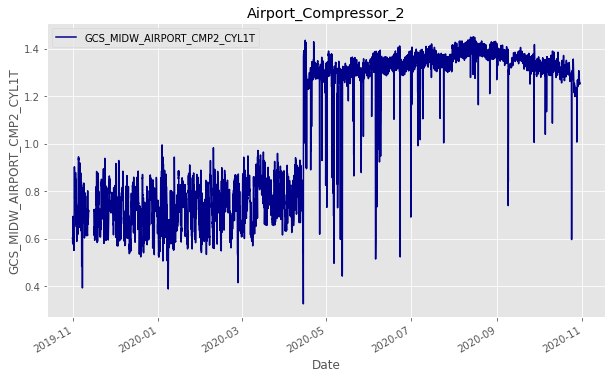

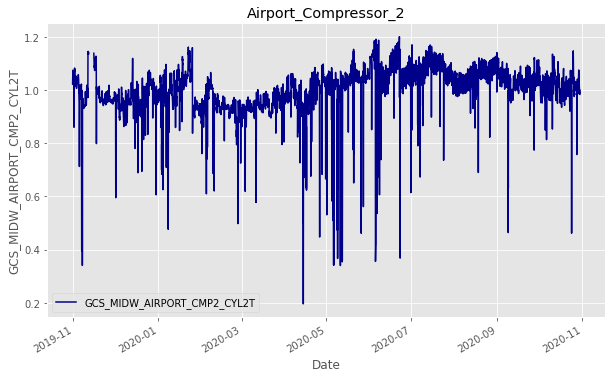

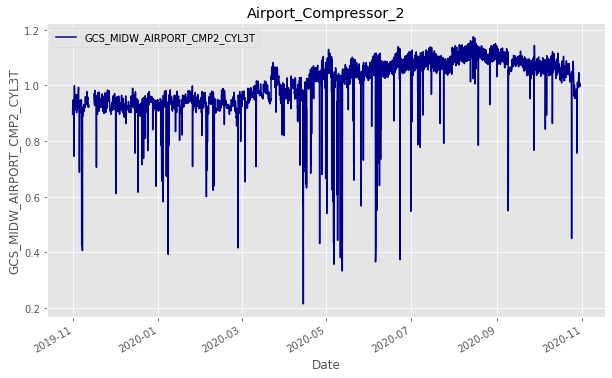

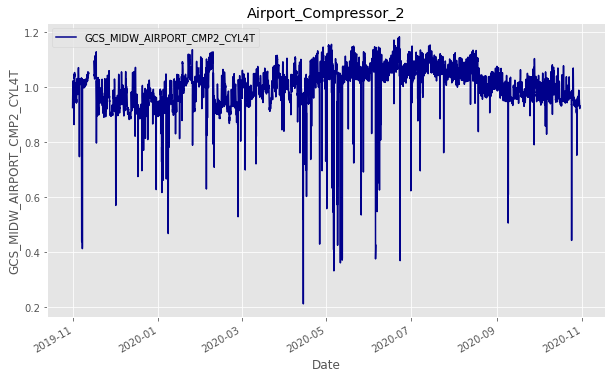

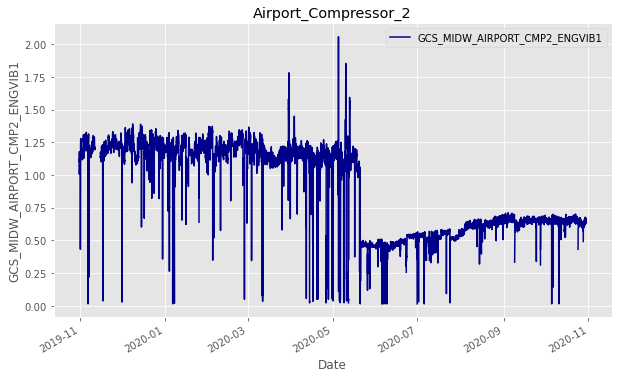

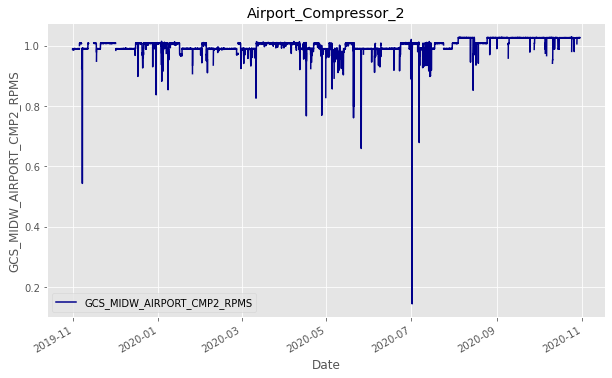

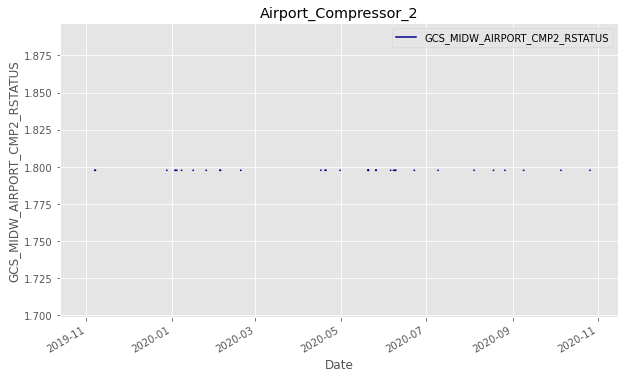

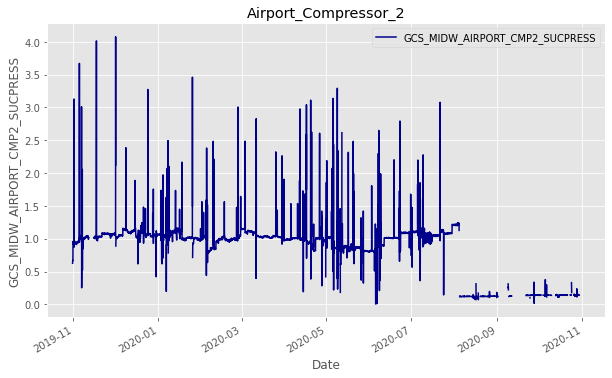

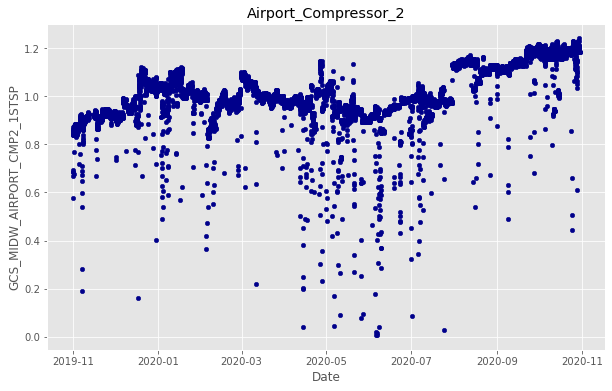

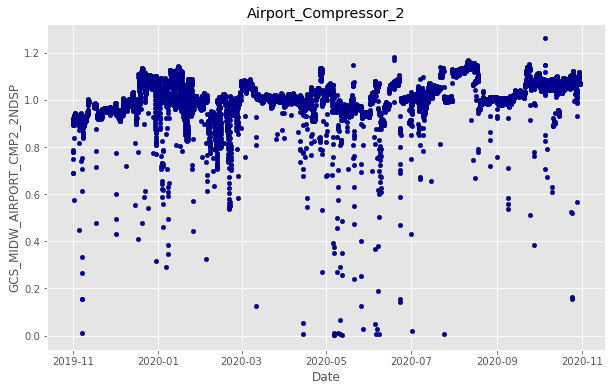

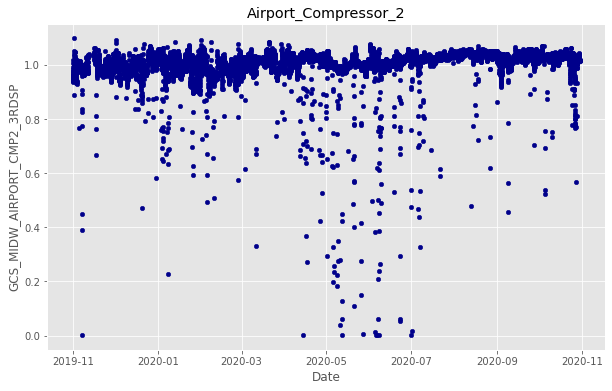

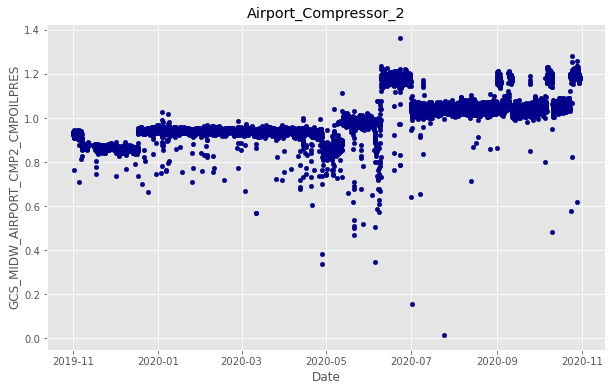

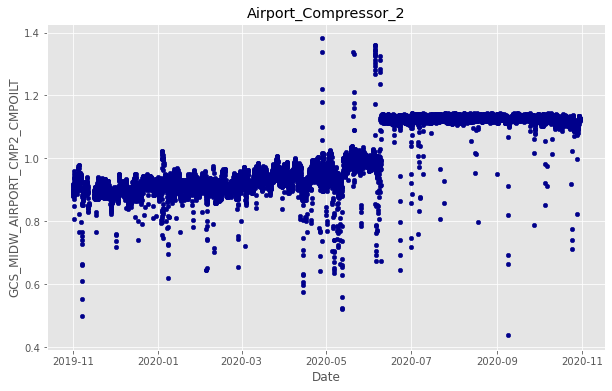

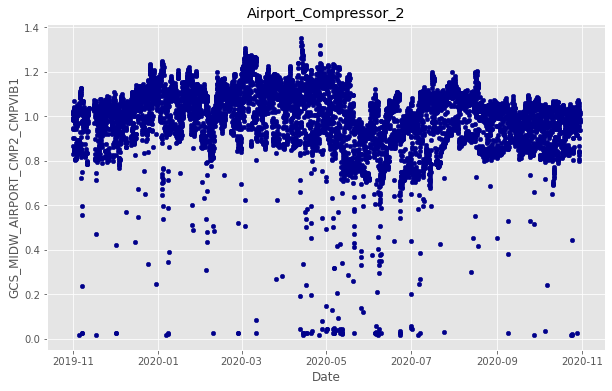

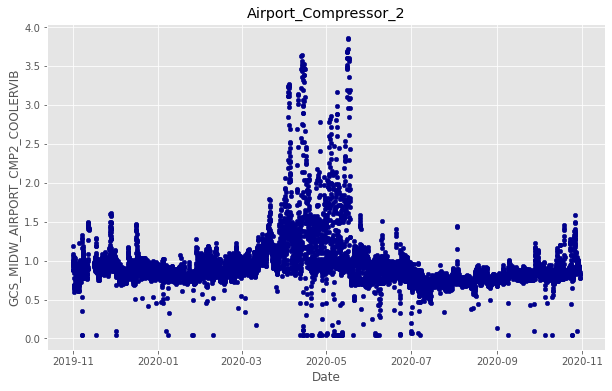

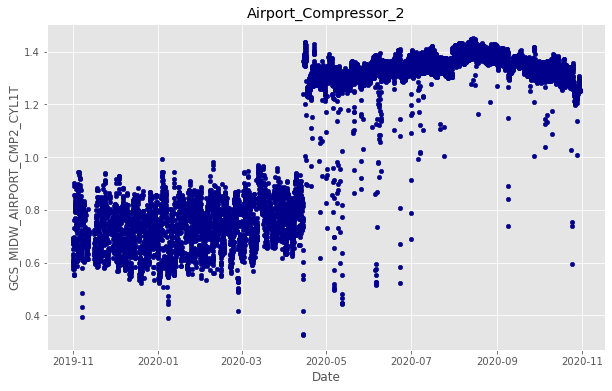

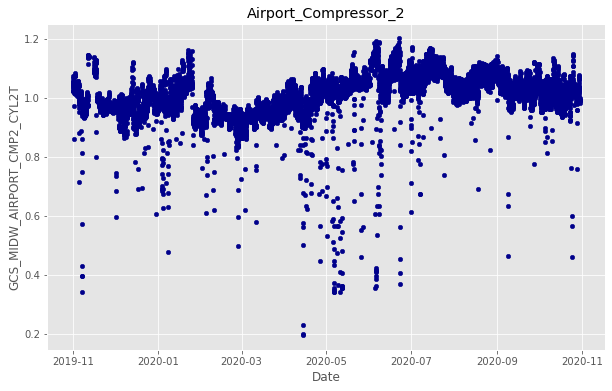

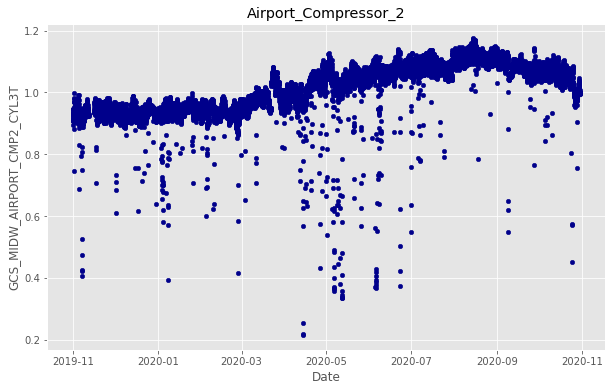

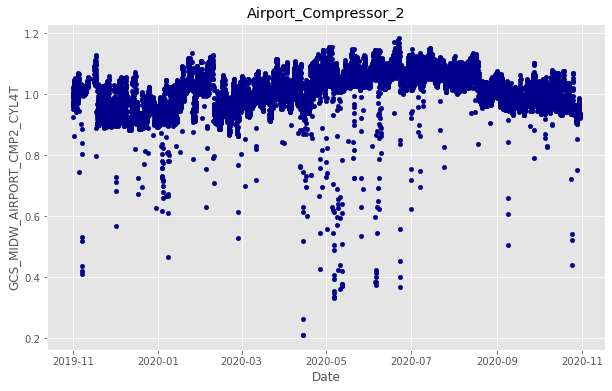

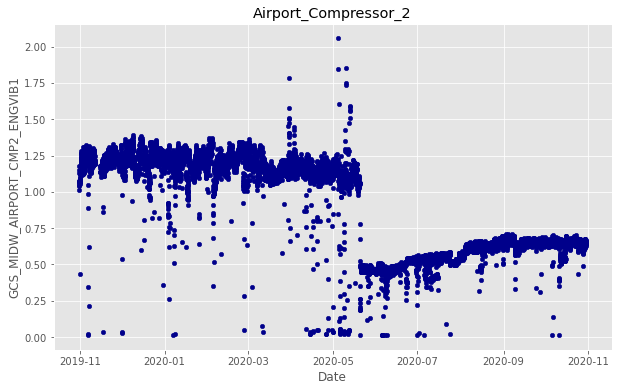

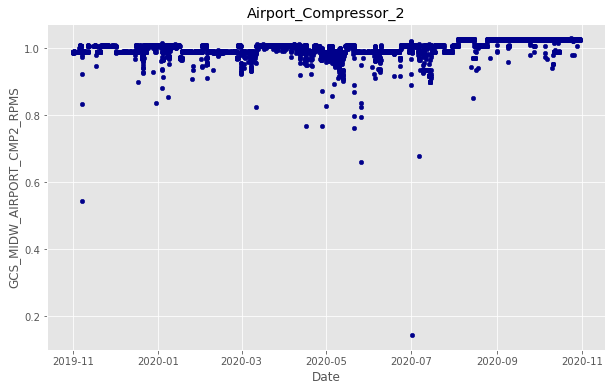

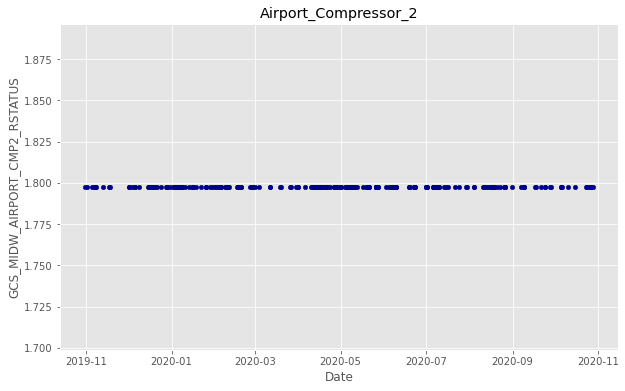

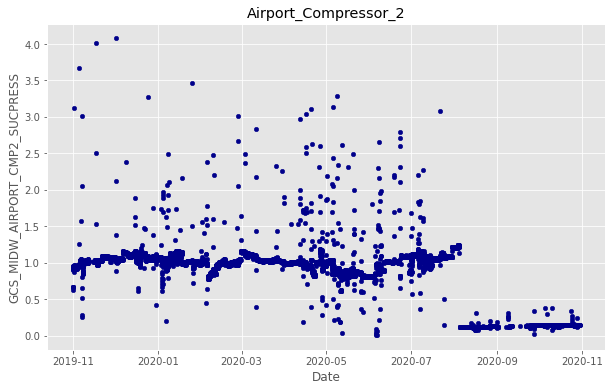

In [98]:
n=1
df_hour_cols=df_hour.columns
while n < df_hour.shape[1]:
    df_hour.plot(kind='line', x= df_hour_cols[0], y=df_hour_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_hour_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

n=1
df_hour_cols=df_hour.columns
while n < df_hour.shape[1]:
    df_hour.plot(kind='scatter', x= df_hour_cols[0], y=df_hour_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_hour_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

## Group by day

In [99]:
# Group by datetime to nearest hour
df_day = df_min.copy(deep=True)
df_day['DateTime'] = df_day['DateTime'].dt.round('D')
df_day = df_day.groupby(['DateTime'], as_index=False).mean()
display(df_day.describe())
display(df_day)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                   363.000000                   363.000000   
mean                      0.997686                     0.998406   
std                       0.102642                     0.068736   
min                       0.634925                     0.703187   
25%                       0.932954                     0.961475   
50%                       0.981602                     1.001633   
75%                       1.073240                     1.046224   
max                       1.202979                     1.149413   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                   363.000000                        363.000000   
mean                      1.000225                          0.984161   
std                       0.037720                          0.090553   
min                       0.828756                          0.844836   
25%                       0.982205                          0.931508   
50%                       1.006417                          0.945428   
75%                       1.027511                          1.043045   
max                       1.060181                          1.209580   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                     363.000000                     363.000000   
mean                        1.001169                       0.990362   
std                         0.102860                       0.078214   
min                         0.807389                       0.717697   
25%                         0.909699                       0.945597   
50%                         0.956995                       0.994366   
75%                         1.124044                       1.041365   
max                         1.185639                       1.212252   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                       363.000000                   363.000000   
mean                          0.956652                     1.055009   
std                           0.286449                     0.297174   
min                           0.631569                     0.568860   
25%                           0.807544                     0.749613   
50%                           0.869871                     1.218040   
75%                           0.979772                     1.330976   
max                           2.741039                     1.408103   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                   363.000000                   363.000000   
mean                      1.001476                     1.003090   
std                       0.061434                     0.072821   
min                       0.766923                     0.798154   
25%                       0.956124                     0.940450   
50%                       1.007643                     1.000679   
75%                       1.044722                     1.066284   
max                       1.147967                     1.137848   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                   363.000000                     363.000000   
mean                      1.003424                       0.903954   
std                       0.056262                       0.309859   
min                       0.807146                       0.399701   
25%                       0.965306                       0.619890   
50%                       1.000209                       1.082189   
75%                       1.051820                       1.192051   
max                       1.133784                       1.328185   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                  363.000000                   1.440000e+02   
mean                     1.001390                   1.797619e+00   
std                      0.016214           

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0   2019-10-31                     0.673210                     0.703187   
1   2019-11-01                     0.819496                     0.849788   
2   2019-11-02                     0.867310                     0.925656   
3   2019-11-03                     0.850601                     0.908206   
4   2019-11-04                     0.859441                     0.911201   
..         ...                          ...                          ...   
359 2020-10-26                     1.189587                     1.092460   
360 2020-10-27                     1.153284                     1.060466   
361 2020-10-28                     1.081876                     1.003930   
362 2020-10-29                     1.202979                     1.071019   
363 2020-10-30                     1.195727                     1.084573   

     GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                       1.010144                          0.933638   
1                       0.969680                          0.926762   
2                       1.012050                          0.924678   
3                       0.970814                          0.925175   
4                       0.985176                          0.925952   
..                           ...                               ...   
359                     0.988018                          1.203067   
360                     0.870222                          1.202649   
361                     0.986495                          1.179548   
362                     1.022128                          1.209580   
363                     1.030458                          1.178821   

     GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                         0.886213                       1.006421   
1                         0.890982                       0.990496   
2                         0.916484                       0.918638   
3                         0.920192                       0.950453   
4                         0.923920                       0.943085   
..                             ...                            ...   
359                       1.102480                       0.925007   
360                       1.105250                       0.959622   
361                       1.078528                       0.991144   
362                       1.103429                       1.021970   
363                       1.128225                       0.933504   

     GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                           1.080827                     0.598935   
1                           0.959343                     0.621576   
2                           0.846073                     0.802316   
3                           0.842156                     0.726725   
4                           0.754895                     0.686283   
..                               ...                          ...   
359                         1.099134                     1.281794   
360                         1.290016                     1.225037   
361                         0.922492                     1.205272   
362                         0.958316                     1.252573   
363                         0.873370                     1.275550   

     GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0                       1.033795                     0.905242   
1                       1.026671                     0.909963   
2                       1.053187                     0.948264   
3                       1.034884                     0.934822   
4                       1.039813                     0.943628   
..                           ...                          ...   
359                     1.058033                     1.024588   
360                     1.017637                     0.975673   
361      

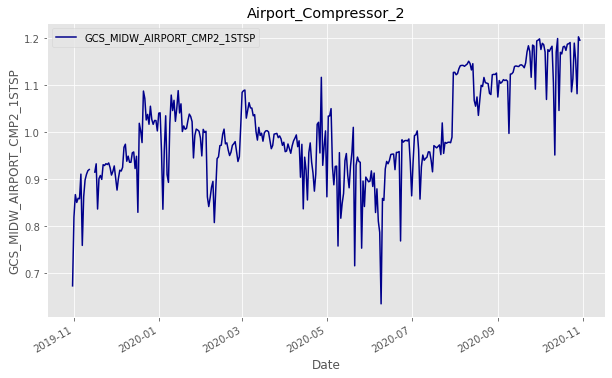

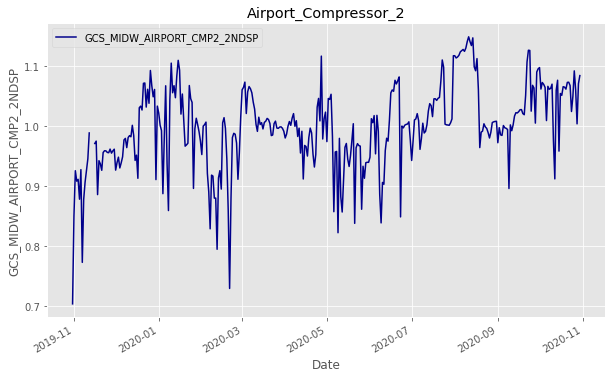

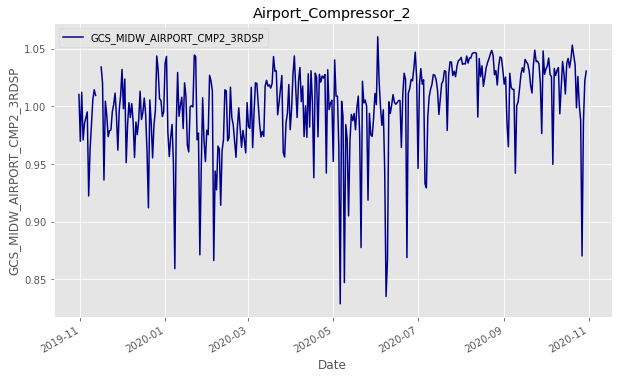

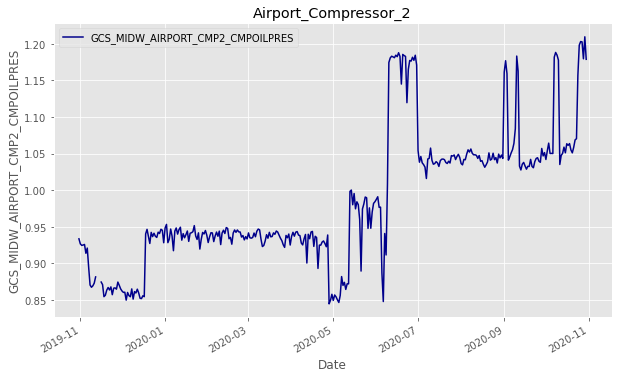

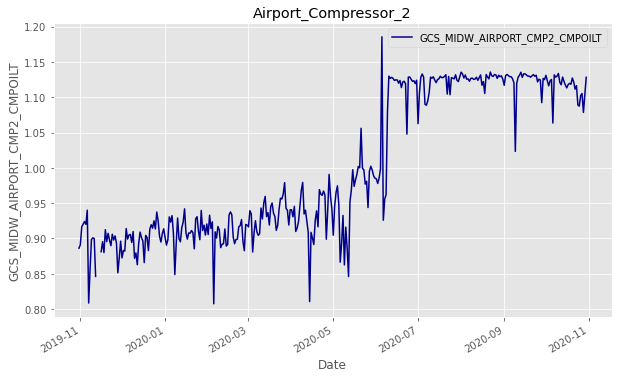

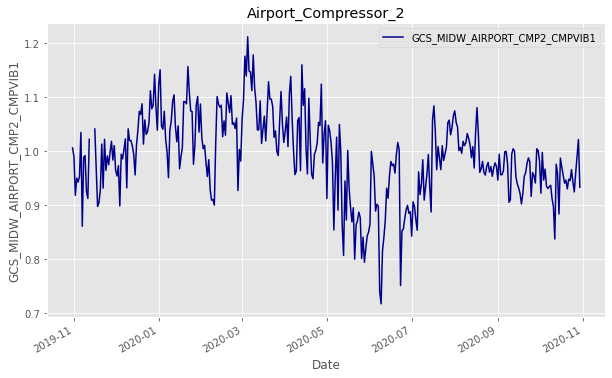

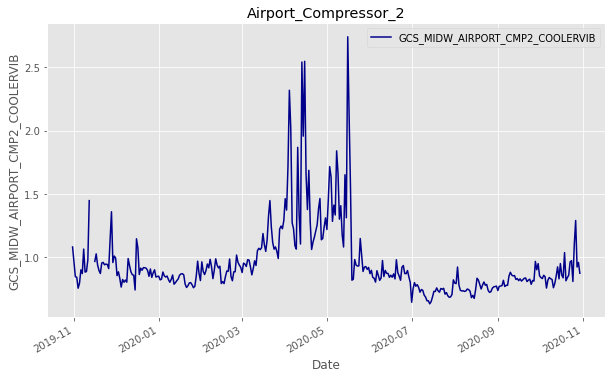

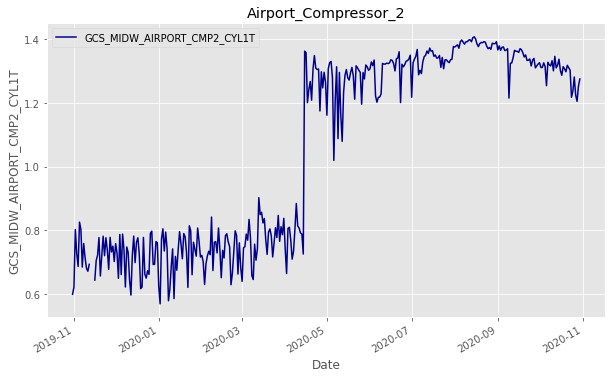

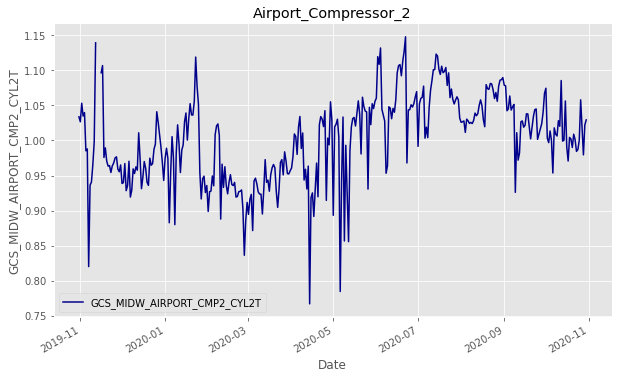

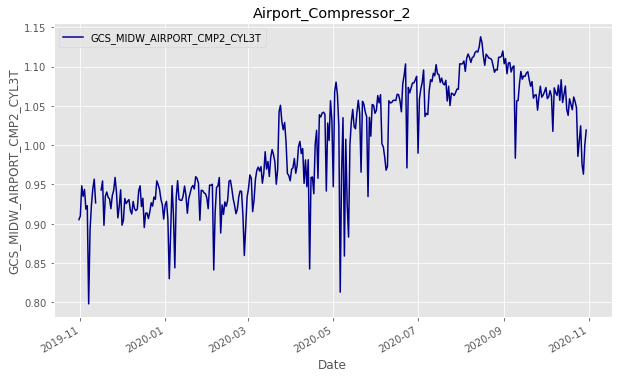

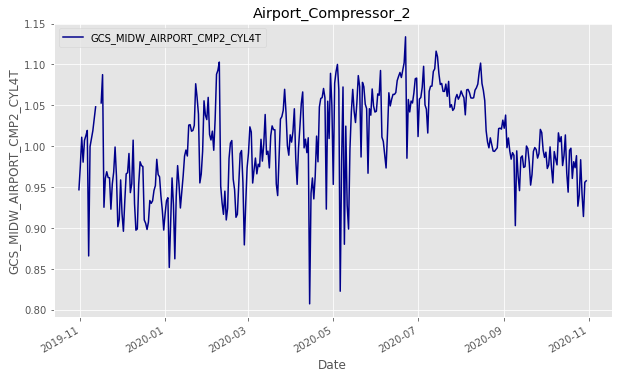

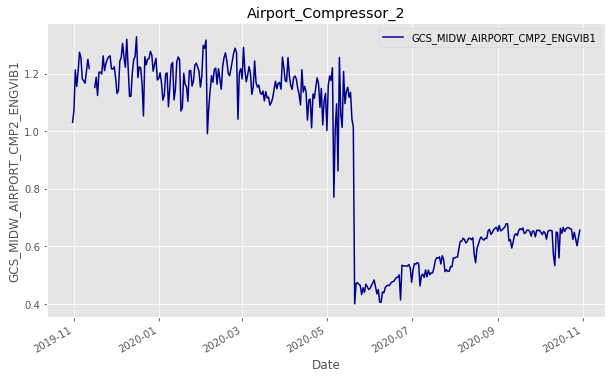

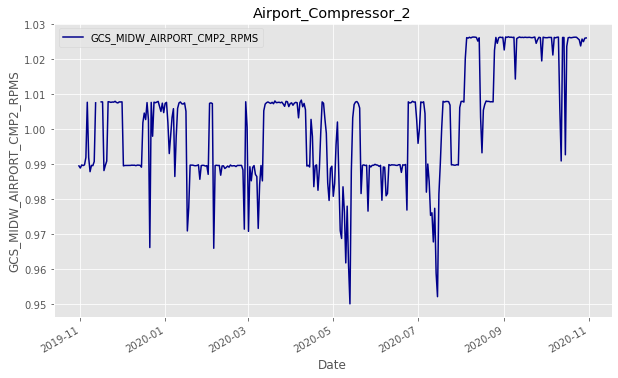

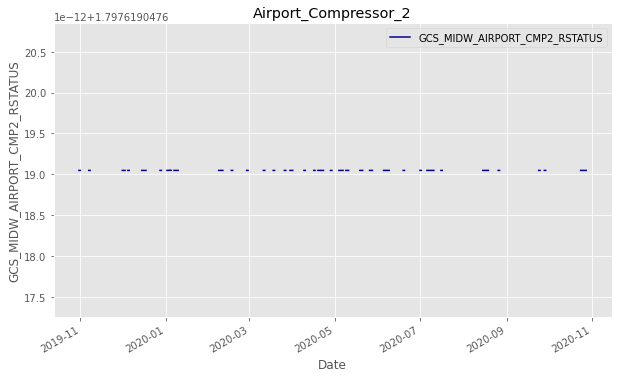

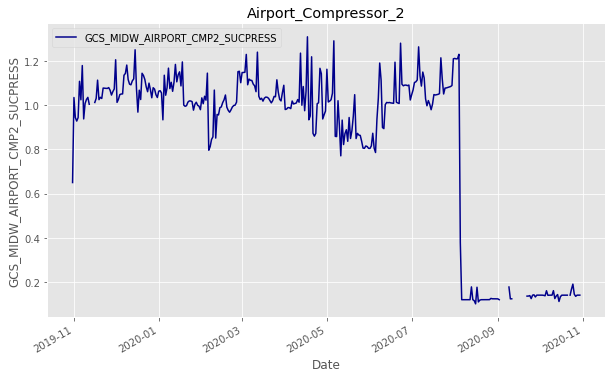

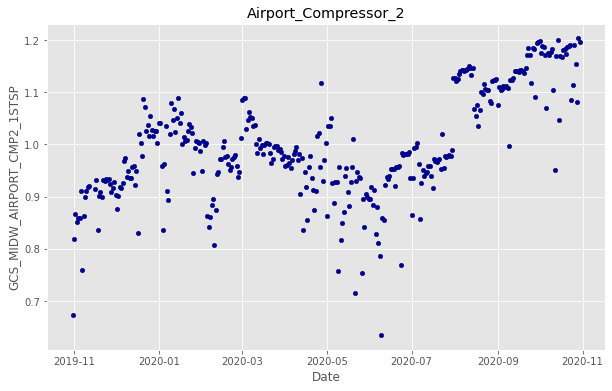

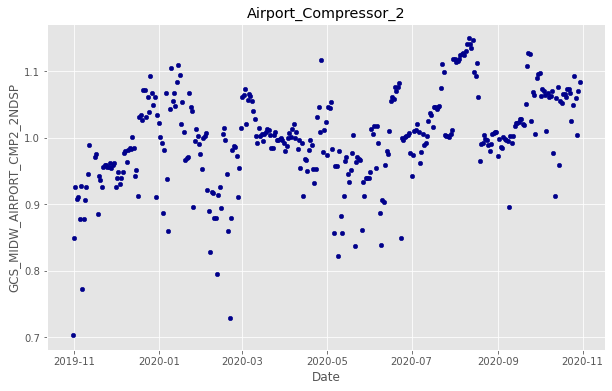

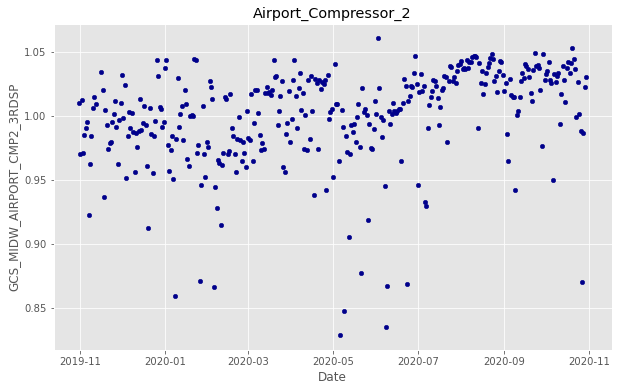

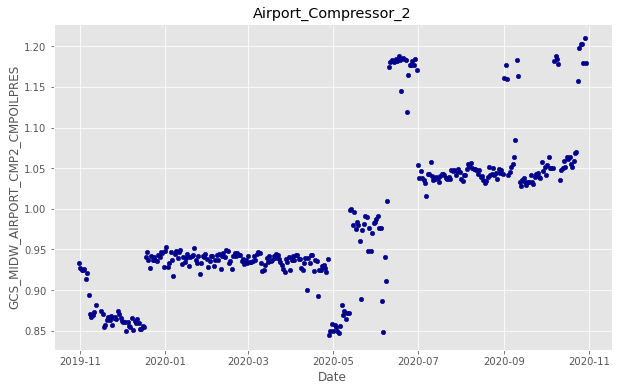

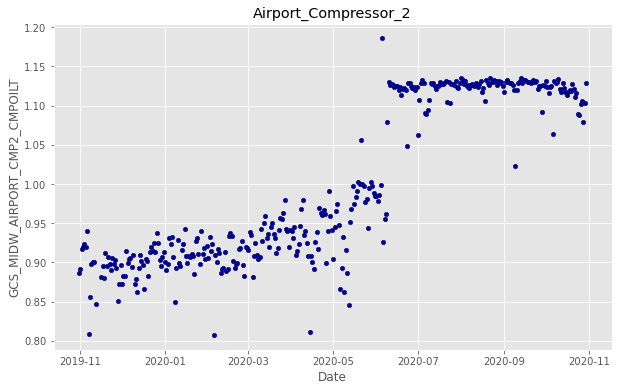

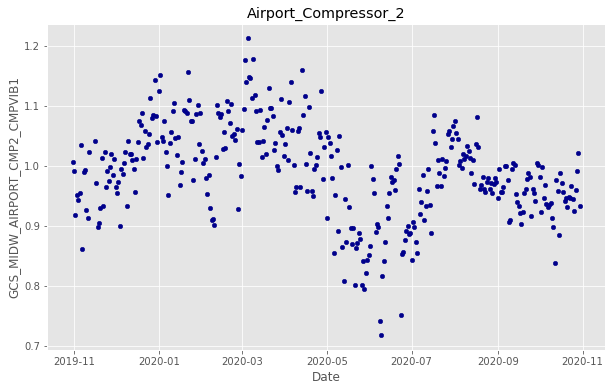

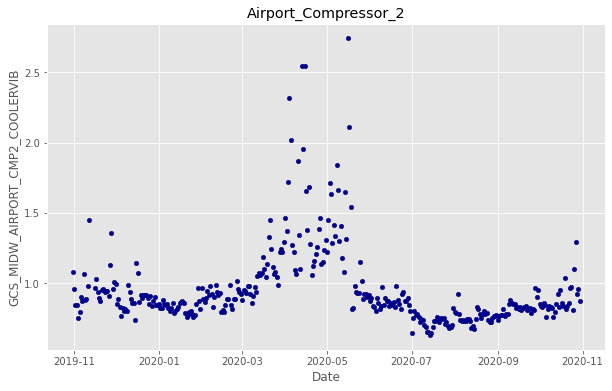

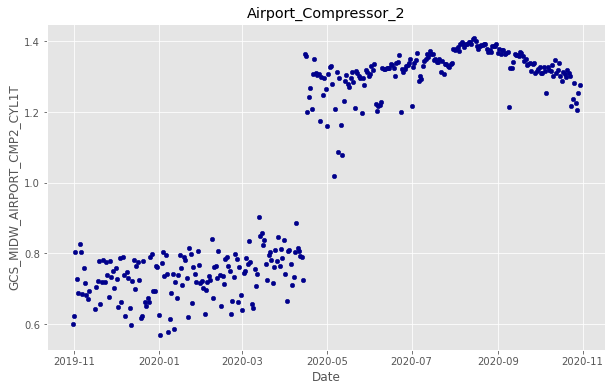

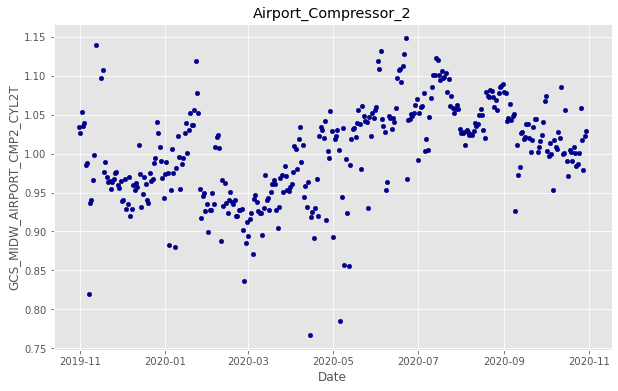

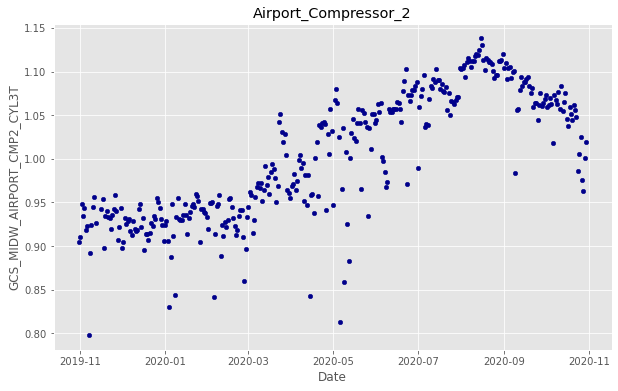

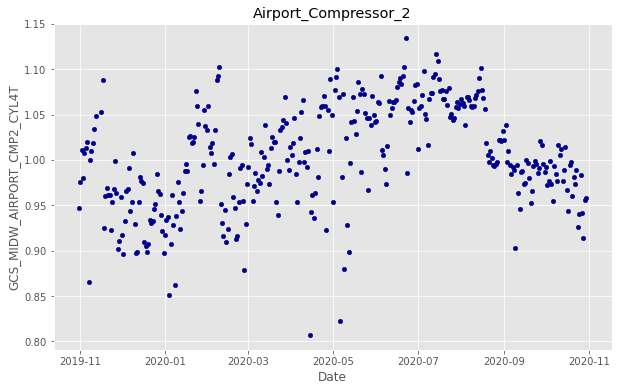

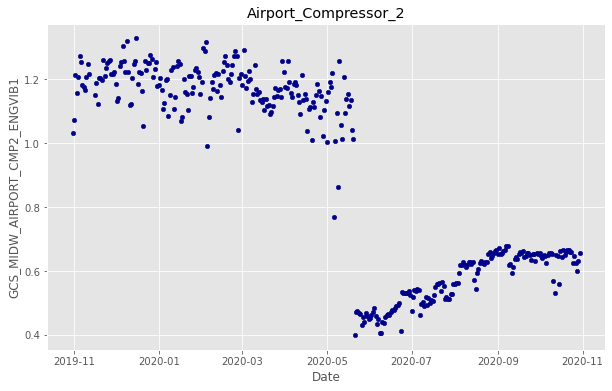

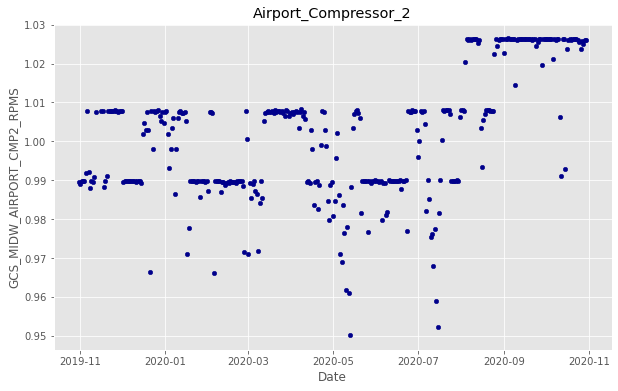

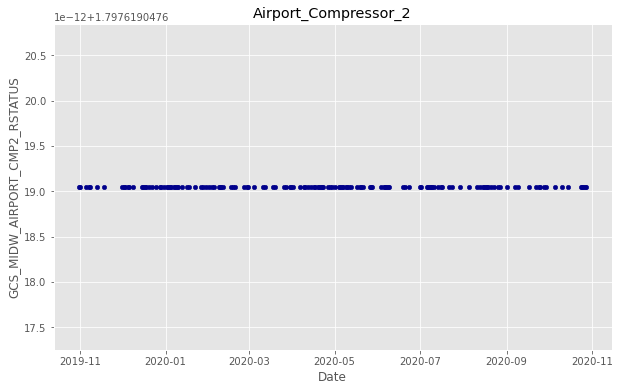

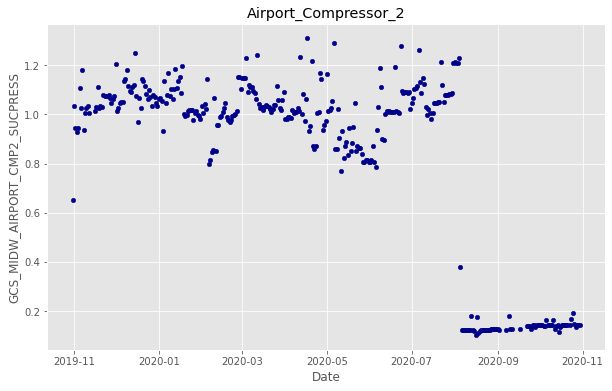

In [100]:
n=1
df_day_cols=df_day.columns
while n < df_day.shape[1]:
    df_day.plot(kind='line', x= df_day_cols[0], y=df_day_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_day_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

n=1
df_day_cols=df_day.columns
while n < df_day.shape[1]:
    df_day.plot(kind='scatter', x= df_day_cols[0], y=df_day_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_day_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

## Cluster analysis

In [102]:
# Fill NAN cells with surrounding data
df_day_fill = df_day.fillna(method='ffill')
df_day_fill = df_day_fill.fillna(method='bfill')
display(df_day_fill)
display(df_day_fill.isna().describe())

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0   2019-10-31                     0.673210                     0.703187   
1   2019-11-01                     0.819496                     0.849788   
2   2019-11-02                     0.867310                     0.925656   
3   2019-11-03                     0.850601                     0.908206   
4   2019-11-04                     0.859441                     0.911201   
..         ...                          ...                          ...   
359 2020-10-26                     1.189587                     1.092460   
360 2020-10-27                     1.153284                     1.060466   
361 2020-10-28                     1.081876                     1.003930   
362 2020-10-29                     1.202979                     1.071019   
363 2020-10-30                     1.195727                     1.084573   

     GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                       1.010144                          0.933638   
1                       0.969680                          0.926762   
2                       1.012050                          0.924678   
3                       0.970814                          0.925175   
4                       0.985176                          0.925952   
..                           ...                               ...   
359                     0.988018                          1.203067   
360                     0.870222                          1.202649   
361                     0.986495                          1.179548   
362                     1.022128                          1.209580   
363                     1.030458                          1.178821   

     GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                         0.886213                       1.006421   
1                         0.890982                       0.990496   
2                         0.916484                       0.918638   
3                         0.920192                       0.950453   
4                         0.923920                       0.943085   
..                             ...                            ...   
359                       1.102480                       0.925007   
360                       1.105250                       0.959622   
361                       1.078528                       0.991144   
362                       1.103429                       1.021970   
363                       1.128225                       0.933504   

     GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                           1.080827                     0.598935   
1                           0.959343                     0.621576   
2                           0.846073                     0.802316   
3                           0.842156                     0.726725   
4                           0.754895                     0.686283   
..                               ...                          ...   
359                         1.099134                     1.281794   
360                         1.290016                     1.225037   
361                         0.922492                     1.205272   
362                         0.958316                     1.252573   
363                         0.873370                     1.275550   

     GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0                       1.033795                     0.905242   
1                       1.026671                     0.909963   
2                       1.053187                     0.948264   
3                       1.034884                     0.934822   
4                       1.039813                     0.943628   
..                           ...                          ...   
359                     1.058033                     1.024588   
360                     1.017637                     0.975673   
361      

DateTime GCS_MIDW_AIRPORT_CMP2_1STSP GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count       364                         364                         364   
unique        1                           1                           1   
top       False                       False                       False   
freq        364                         364                         364   

       GCS_MIDW_AIRPORT_CMP2_3RDSP GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                          364                              364   
unique                           1                                1   
top                          False                            False   
freq                           364                              364   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                            364                           364   
unique                             1                             1   
top                            False                         False   
freq                             364                           364   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                              364                         364   
unique                               1                           1   
top                              False                       False   
freq                               364                         364   

       GCS_MIDW_AIRPORT_CMP2_CYL2T GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                          364                         364   
unique                           1                           1   
top                          False                       False   
freq                           364                         364   

       GCS_MIDW_AIRPORT_CMP2_CYL4T GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                          364                           364   
unique                           1                             1   
top                          False                         False   
freq                           364                           364   

       GCS_MIDW_AIRPORT_CMP2_RPMS GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                         364                           364   
unique                          1                             1   
top                         False                         False   
freq                          364                           364   

       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
count                             364  
unique                              1  
top                             False  
freq                              364

In [103]:
df_day_fill.columns

Index(['DateTime', 'GCS_MIDW_AIRPORT_CMP2_1STSP',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'GCS_MIDW_AIRPORT_CMP2_3RDSP',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'GCS_MIDW_AIRPORT_CMP2_CYL2T',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'GCS_MIDW_AIRPORT_CMP2_CYL4T',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'GCS_MIDW_AIRPORT_CMP2_RPMS',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

In [104]:
# Find k value that gives best separation between clusters

# Create list of columns
day_fill_cols=df_day_fill.columns

# Create new df without datetime column
df_cluster = df_day_fill[day_fill_cols[1:]]

k_values=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for k in k_values:
    # set number of clusters
    kclusters = k  # evaluating 3-20
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster)
    # Check cluster labels generated for each row in the dataframe
    # Check distribution of neghborhoods in each cluster
    from collections import Counter
    print(k, Counter(kmeans.labels_))

3 Counter({1: 199, 2: 87, 0: 78})
4 Counter({1: 155, 2: 87, 0: 78, 3: 44})
5 Counter({0: 156, 1: 87, 2: 78, 3: 35, 4: 8})
6 Counter({1: 124, 0: 87, 2: 76, 4: 35, 5: 32, 3: 10})
7 Counter({0: 128, 3: 87, 5: 54, 2: 33, 6: 32, 1: 22, 4: 8})
8 Counter({2: 87, 7: 71, 0: 57, 5: 55, 3: 32, 4: 31, 1: 23, 6: 8})
9 Counter({1: 87, 5: 70, 0: 57, 2: 52, 6: 32, 7: 25, 8: 24, 3: 11, 4: 6})
10 Counter({1: 87, 5: 70, 0: 57, 2: 52, 6: 32, 7: 24, 8: 24, 3: 9, 9: 5, 4: 4})
11 Counter({5: 70, 0: 57, 2: 52, 1: 48, 10: 39, 6: 32, 7: 24, 8: 24, 3: 9, 9: 5, 4: 4})
12 Counter({5: 70, 0: 57, 2: 52, 1: 48, 10: 39, 6: 32, 8: 24, 7: 23, 3: 9, 9: 4, 4: 4, 11: 2})
13 Counter({8: 69, 12: 57, 10: 48, 2: 39, 6: 35, 1: 29, 0: 21, 11: 20, 3: 19, 9: 8, 4: 8, 7: 7, 5: 4})
14 Counter({0: 69, 9: 55, 2: 53, 1: 48, 10: 39, 6: 26, 4: 21, 8: 19, 5: 10, 3: 9, 7: 5, 11: 4, 12: 3, 13: 3})
15 Counter({0: 66, 2: 53, 1: 48, 9: 41, 10: 39, 6: 26, 4: 21, 8: 19, 14: 17, 5: 10, 3: 9, 7: 5, 11: 4, 12: 3, 13: 3})
16 Counter({0: 66, 1: 48, 9

In [105]:
# Run clustering again with k=10 (trying to minimize the size of the clusters to identify days
# that are most similar to each other)

# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster)

# check cluster labels generated for each row in the dataframe
# Check distribution of neghborhoods in each cluster
from collections import Counter
print(Counter(kmeans.labels_))

Counter({1: 87, 5: 70, 0: 57, 2: 52, 6: 32, 7: 24, 8: 24, 3: 9, 9: 5, 4: 4})


In [106]:
# Add cluster labels to df_day_fill
df_day_fill.insert(1, 'Cluster_Label', kmeans.labels_)

print(df_day_fill.shape)
display(df_day_fill)

(364, 17)


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0   2019-10-31              0                     0.673210   
1   2019-11-01              0                     0.819496   
2   2019-11-02              0                     0.867310   
3   2019-11-03              0                     0.850601   
4   2019-11-04              0                     0.859441   
..         ...            ...                          ...   
359 2020-10-26              1                     1.189587   
360 2020-10-27              1                     1.153284   
361 2020-10-28              1                     1.081876   
362 2020-10-29              1                     1.202979   
363 2020-10-30              1                     1.195727   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                       0.703187                     1.010144   
1                       0.849788                     0.969680   
2                       0.925656                     1.012050   
3                       0.908206                     0.970814   
4                       0.911201                     0.985176   
..                           ...                          ...   
359                     1.092460                     0.988018   
360                     1.060466                     0.870222   
361                     1.003930                     0.986495   
362                     1.071019                     1.022128   
363                     1.084573                     1.030458   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0                            0.933638                       0.886213   
1                            0.926762                       0.890982   
2                            0.924678                       0.916484   
3                            0.925175                       0.920192   
4                            0.925952                       0.923920   
..                                ...                            ...   
359                          1.203067                       1.102480   
360                          1.202649                       1.105250   
361                          1.179548                       1.078528   
362                          1.209580                       1.103429   
363                          1.178821                       1.128225   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0                         1.006421                         1.080827   
1                         0.990496                         0.959343   
2                         0.918638                         0.846073   
3                         0.950453                         0.842156   
4                         0.943085                         0.754895   
..                             ...                              ...   
359                       0.925007                         1.099134   
360                       0.959622                         1.290016   
361                       0.991144                         0.922492   
362                       1.021970                         0.958316   
363                       0.933504                         0.873370   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0                       0.598935                     1.033795   
1                       0.621576                     1.026671   
2                       0.802316                     1.053187   
3                       0.726725                     1.034884   
4                       0.686283                     1.039813   
..                           ...                          ...   
359                     1.281794                     1.058033   
360                     1.225037                     1.017637   
361                     1.205272                     0.979495   
362                     1.252573                     1.022170   
363                     1.275550               

In [107]:
# Print clusters and separate dataframes
for label in range(kclusters-1):
    name = 'Cluster_'+str(label)
    name = df_day_fill.loc[df_day_fill['Cluster_Label'] == label]
    print('Cluster_'+str(label))
    display(name)

Cluster_0


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0   2019-10-31              0                     0.673210   
1   2019-11-01              0                     0.819496   
2   2019-11-02              0                     0.867310   
3   2019-11-03              0                     0.850601   
4   2019-11-04              0                     0.859441   
5   2019-11-05              0                     0.858456   
6   2019-11-06              0                     0.910883   
7   2019-11-07              0                     0.759205   
8   2019-11-08              0                     0.862686   
9   2019-11-09              0                     0.898328   
10  2019-11-10              0                     0.910209   
11  2019-11-11              0                     0.918107   
14  2019-11-16              0                     0.915112   
15  2019-11-17              0                     0.932784   
16  2019-11-18              0                     0.836620   
17  2019-11-19              0                     0.901344   
18  2019-11-20              0                     0.907998   
19  2019-11-21              0                     0.899645   
20  2019-11-22              0                     0.930926   
21  2019-11-23              0                     0.929147   
22  2019-11-24              0                     0.933036   
23  2019-11-25              0                     0.931317   
24  2019-11-26              0                     0.934679   
27  2019-11-29              0                     0.916592   
28  2019-11-30              0                     0.928291   
29  2019-12-01              0                     0.902513   
30  2019-12-02              0                     0.876898   
31  2019-12-03              0                     0.901964   
32  2019-12-04              0                     0.919262   
33  2019-12-05              0                     0.917391   
34  2019-12-06              0                     0.925275   
38  2019-12-10              0                     0.949115   
39  2019-12-11              0                     0.936077   
40  2019-12-12              0                     0.936065   
45  2019-12-17              0                     0.829579   
63  2020-01-04              0                     0.836134   
66  2020-01-07              0                     0.909885   
67  2020-01-08              0                     0.893282   
85  2020-01-26              0                     0.945307   
91  2020-02-01              0                     0.949613   
95  2020-02-05              0                     0.862623   
96  2020-02-06              0                     0.841887   
97  2020-02-07              0                     0.860636   
98  2020-02-08              0                     0.883330   
99  2020-02-09              0                     0.895448   
100 2020-02-10              0                     0.807793   
101 2020-02-11              0                     0.874821   
102 2020-02-12              0                     0.943722   
103 2020-02-13              0                     0.947680   
104 2020-02-14              0                     0.971465   
105 2020-02-15              0                     0.972339   
110 2020-02-20              0                     0.961971   
111 2020-02-21              0                     0.950362   
112 2020-02-22              0                     0.957528   
116 2020-02-26              0                     0.958138   
117 2020-02-27              0                     0.937710   
118 2020-02-28              0                     0.947823   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                       0.703187                     1.010144   
1                       0.849788                     0.969680   
2                       0.925656                     1.012050   
3                       0.908206                     0.970814   
4                       0.911201                     0.985176   
5                  

Cluster_1


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
277 2020-08-05              1                     1.141556   
278 2020-08-06              1                     1.142128   
279 2020-08-07              1                     1.142166   
280 2020-08-08              1                     1.140237   
281 2020-08-09              1                     1.142850   
..         ...            ...                          ...   
359 2020-10-26              1                     1.189587   
360 2020-10-27              1                     1.153284   
361 2020-10-28              1                     1.081876   
362 2020-10-29              1                     1.202979   
363 2020-10-30              1                     1.195727   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
277                     1.124258                     1.043513   
278                     1.126150                     1.037409   
279                     1.128275                     1.041868   
280                     1.125062                     1.041766   
281                     1.130729                     1.045683   
..                           ...                          ...   
359                     1.092460                     0.988018   
360                     1.060466                     0.870222   
361                     1.003930                     0.986495   
362                     1.071019                     1.022128   
363                     1.084573                     1.030458   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
277                          1.049368                       1.125571   
278                          1.055196                       1.126058   
279                          1.052142                       1.122629   
280                          1.056334                       1.126829   
281                          1.050524                       1.127165   
..                                ...                            ...   
359                          1.203067                       1.102480   
360                          1.202649                       1.105250   
361                          1.179548                       1.078528   
362                          1.209580                       1.103429   
363                          1.178821                       1.128225   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
277                       1.007462                         0.739402   
278                       0.996311                         0.733277   
279                       1.018802                         0.734706   
280                       1.010660                         0.730085   
281                       1.016255                         0.733210   
..                             ...                              ...   
359                       0.925007                         1.099134   
360                       0.959622                         1.290016   
361                       0.991144                         0.922492   
362                       1.021970                         0.958316   
363                       0.933504                         0.873370   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
277                     1.392472                     1.030481   
278                     1.398082                     1.028119   
279                     1.391599                     1.024337   
280                     1.385110                     1.025783   
281                     1.392304                     1.024146   
..                           ...                          ...   
359                     1.281794                     1.058033   
360                     1.225037                     1.017637   
361                     1.205272                     0.979495   
362                     1.252573                     1.022170   
363                     1.275550               

Cluster_2


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
223 2020-06-12              2                     0.921753   
224 2020-06-13              2                     0.937913   
225 2020-06-14              2                     0.932871   
226 2020-06-15              2                     0.940039   
227 2020-06-16              2                     0.952587   
228 2020-06-17              2                     0.953418   
229 2020-06-18              2                     0.953516   
230 2020-06-19              2                     0.920361   
231 2020-06-20              2                     0.957120   
232 2020-06-21              2                     0.957070   
233 2020-06-22              2                     0.958895   
235 2020-06-24              2                     0.983941   
236 2020-06-25              2                     0.978960   
237 2020-06-26              2                     0.982011   
238 2020-06-27              2                     0.982508   
239 2020-06-28              2                     0.981436   
240 2020-06-29              2                     0.985678   
241 2020-06-30              2                     0.935506   
243 2020-07-02              2                     0.935009   
244 2020-07-03              2                     0.992768   
245 2020-07-04              2                     0.994597   
246 2020-07-05              2                     1.002817   
247 2020-07-06              2                     0.962702   
248 2020-07-07              2                     0.857731   
249 2020-07-08              2                     0.926312   
250 2020-07-09              2                     0.951476   
251 2020-07-10              2                     0.940322   
252 2020-07-11              2                     0.944309   
253 2020-07-12              2                     0.946945   
254 2020-07-13              2                     0.958266   
255 2020-07-14              2                     0.957959   
256 2020-07-15              2                     0.940425   
257 2020-07-16              2                     0.915746   
258 2020-07-17              2                     0.971470   
259 2020-07-18              2                     0.969144   
260 2020-07-19              2                     0.966688   
261 2020-07-20              2                     0.969996   
262 2020-07-21              2                     0.972989   
263 2020-07-22              2                     0.952374   
264 2020-07-23              2                     1.019796   
265 2020-07-24              2                     0.954978   
266 2020-07-25              2                     0.978460   
267 2020-07-26              2                     0.976471   
268 2020-07-27              2                     0.978388   
269 2020-07-28              2                     0.978902   
270 2020-07-29              2                     0.977669   
271 2020-07-30              2                     0.989512   
272 2020-07-31              2                     1.127269   
273 2020-08-01              2                     1.127463   
274 2020-08-02              2                     1.122247   
275 2020-08-03              2                     1.124805   
276 2020-08-04              2                     1.135125   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
223                     0.959200                     1.000854   
224                     0.979923                     1.010107   
225                     0.975046                     1.003321   
226                     1.010351                     1.001696   
227                     1.055706                     1.003199   
228                     1.060641                     1.005015   
229                     1.058341                     1.004954   
230                     1.076812                     0.964279   
231                     1.070642                     1.009918   
232                     1.075945                     1.028637   
233 

Cluster_3


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
166 2020-04-16              3                     0.919354   
168 2020-04-18              3                     0.956387   
182 2020-05-02              3                     1.034363   
183 2020-05-03              3                     1.034587   
184 2020-05-04              3                     1.050214   
188 2020-05-08              3                     0.927863   
194 2020-05-14              3                     0.939709   
197 2020-05-17              3                     0.881756   
198 2020-05-18              3                     0.928107   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
166                     0.965948                     1.003498   
168                     0.980871                     1.028689   
182                     1.046392                     1.040143   
183                     1.044772                     1.008722   
184                     1.053372                     1.008771   
188                     0.957865                     0.991292   
194                     0.964863                     0.992888   
197                     0.932724                     0.979639   
198                     0.951086                     0.998867   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
166                          0.943784                       0.900553   
168                          0.937100                       0.925410   
182                          0.856930                       0.945646   
183                          0.854412                       0.965041   
184                          0.850245                       0.974627   
188                          0.870002                       0.932616   
194                          1.000246                       0.968545   
197                          0.974617                       0.983138   
198                          0.984215                       0.990807   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
166                       1.003541                         1.657646   
168                       1.098638                         1.686453   
182                       1.048473                         1.450966   
183                       1.038260                         1.715856   
184                       1.015926                         1.633999   
188                       1.026407                         1.839987   
194                       0.945221                         1.651258   
197                       0.931028                         2.108419   
198                       0.896918                         1.541282   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
166                     1.358453                     0.925282   
168                     1.242003                     0.930060   
182                     1.308206                     1.019386   
183                     1.326988                     1.023154   
184                     1.330631                     1.030390   
188                     1.313823                     1.033476   
194                     1.286897                     1.019204   
197                     1.272093                     1.020720   
198                     1.295247                     1.039312   

     GCS_MIDW_AIRPORT_CMP2_CYL3T  GCS_MIDW_AIRPORT_CMP2_CYL4T  \
166                     0.959530                     0.961112   
168                     1.001233                     0.963232   
182                     1.067908                     1.077079   
183                     1.080189                     1.091039   
184                     1.064040                     1.100007   
188                     1.034930                     1.072408   
194                     1.030105                     1.041596   
197                     1.020812                     1.028928   
198                     1.041231                     1.053743   



Cluster_4


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
154 2020-04-04              4                     0.965335   
163 2020-04-13              4                     0.974290   
165 2020-04-15              4                     0.946959   
196 2020-05-16              4                     0.908397   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
154                     1.007833                     1.015234   
163                     0.991576                     1.028116   
165                     0.967869                     1.030729   
196                     0.945102                     0.993695   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
154                          0.942773                       0.909919   
163                          0.939909                       0.908626   
165                          0.942952                       0.908629   
196                          0.995523                       0.973834   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
154                       1.106526                         2.318574   
163                       1.160363                         2.541660   
165                       1.116117                         2.547386   
196                       1.001899                         2.741039   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
154                     0.809587                     1.005739   
163                     0.788501                     0.963467   
165                     1.362996                     0.918416   
196                     1.279620                     1.032935   

     GCS_MIDW_AIRPORT_CMP2_CYL3T  GCS_MIDW_AIRPORT_CMP2_CYL4T  \
154                     0.964268                     0.984762   
163                     0.981470                     1.010268   
165                     0.958862                     0.942578   
196                     1.023623                     1.042833   

     GCS_MIDW_AIRPORT_CMP2_ENGVIB1  GCS_MIDW_AIRPORT_CMP2_RPMS  \
154                       1.192193                    1.007738   
163                       1.213885                    0.989752   
165                       1.155753                    1.002868   
196                       1.153216                    1.007107   

     GCS_MIDW_AIRPORT_CMP2_RSTATUS  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
154                       1.797619                        0.988782  
163                       1.797619                        1.000015  
165                       1.797619                        0.975171  
196                       1.797619                        0.836889

Cluster_5


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
35  2019-12-07              5                     0.967958   
36  2019-12-08              5                     0.974508   
37  2019-12-09              5                     0.938257   
41  2019-12-13              5                     0.956212   
42  2019-12-14              5                     0.958059   
..         ...            ...                          ...   
127 2020-03-08              5                     1.051334   
128 2020-03-09              5                     1.034884   
129 2020-03-10              5                     1.037453   
130 2020-03-11              5                     1.001322   
146 2020-03-27              5                     0.988359   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
35                      0.977082                     0.990217   
36                      0.979653                     1.002259   
37                      0.964218                     0.986916   
41                      1.001526                     0.988264   
42                      0.984362                     1.012989   
..                           ...                          ...   
127                     1.055853                     1.001953   
128                     1.040203                     0.984483   
129                     1.028541                     0.973349   
130                     1.003193                     0.978212   
146                     0.996379                     0.955961   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
35                           0.854533                       0.905784   
36                           0.865240                       0.894372   
37                           0.851350                       0.909814   
41                           0.859663                       0.893109   
42                           0.852427                       0.909021   
..                                ...                            ...   
127                          0.946974                       0.904417   
128                          0.945907                       0.906775   
129                          0.933117                       0.943031   
130                          0.923113                       0.927610   
146                          0.921960                       0.979064   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
35                        1.003789                         0.802225   
36                        1.023126                         0.819686   
37                        0.932413                         0.802878   
41                        1.010144                         0.861809   
42                        0.994644                         0.857385   
..                             ...                              ...   
127                       1.112664                         0.860610   
128                       1.178707                         0.910416   
129                       1.118140                         0.971164   
130                       1.090804                         0.934692   
146                       0.992234                         0.989692   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
35                      0.738471                     0.919290   
36                      0.621763                     0.929017   
37                      0.747632                     0.959492   
41                      0.720946                     1.010992   
42                      0.781926                     0.974283   
..                           ...                          ...   
127                     0.657568                     0.926615   
128                     0.645225                     0.923602   
129                     0.756420                     0.923404   
130                     0.706112                     0.895166   
146                     0.846707               

Cluster_6


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
12  2019-11-12              6                     0.920721   
13  2019-11-13              6                     0.920721   
25  2019-11-27              6                     0.924699   
26  2019-11-28              6                     0.908865   
44  2019-12-16              6                     0.948823   
131 2020-03-12              6                     0.983237   
132 2020-03-13              6                     1.010314   
133 2020-03-14              6                     0.993078   
134 2020-03-15              6                     0.997938   
135 2020-03-16              6                     0.980923   
136 2020-03-17              6                     0.998822   
137 2020-03-18              6                     1.002856   
138 2020-03-19              6                     1.003308   
139 2020-03-20              6                     1.000761   
140 2020-03-21              6                     0.983523   
141 2020-03-22              6                     0.964942   
142 2020-03-23              6                     0.971816   
143 2020-03-24              6                     0.995898   
144 2020-03-25              6                     0.996693   
145 2020-03-26              6                     0.997548   
147 2020-03-28              6                     0.992117   
148 2020-03-29              6                     0.985844   
149 2020-03-30              6                     0.972136   
150 2020-03-31              6                     0.978641   
151 2020-04-01              6                     0.958615   
152 2020-04-02              6                     0.960014   
156 2020-04-06              6                     0.970915   
157 2020-04-07              6                     0.981602   
158 2020-04-08              6                     0.987304   
159 2020-04-09              6                     0.994270   
161 2020-04-11              6                     0.981783   
162 2020-04-12              6                     0.904242   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
12                      0.988741                     1.009370   
13                      0.988741                     1.009370   
25                      0.961771                     0.991453   
26                      0.955027                     0.961978   
44                      0.951631                     0.994514   
131                     0.991390                     0.973900   
132                     1.015053                     1.017621   
133                     1.002918                     1.022507   
134                     1.005893                     1.017468   
135                     0.995432                     1.018486   
136                     1.006352                     1.015725   
137                     1.008381                     1.019901   
138                     1.013033                     1.043041   
139                     1.011154                     1.030315   
140                     1.004588                     1.030722   
141                     0.984352                     0.992712   
142                     0.985293                     1.003181   
143                     1.004400                     1.015263   
144                     1.008484                     1.026650   
145                     0.996986                     0.959985   
147                     0.998535                     0.985496   
148                     0.998988                     0.993921   
149                     0.996566                     1.018837   
150                     0.991606                     0.979725   
151                     0.980336                     0.997191   
152                     0.986909                     1.027678   
156                     1.013572                     1.021691   
157                     1.021052                     1.033580   
158                     0.999889                     1.003958   
159      

Cluster_7


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
167 2020-04-17              7                     0.855867   
169 2020-04-19              7                     0.977273   
170 2020-04-20              7                     0.936553   
171 2020-04-21              7                     0.913238   
172 2020-04-22              7                     0.874636   
173 2020-04-23              7                     0.911399   
174 2020-04-24              7                     1.016941   
175 2020-04-25              7                     1.021134   
176 2020-04-26              7                     0.955861   
177 2020-04-27              7                     1.116783   
178 2020-04-28              7                     0.929564   
179 2020-04-29              7                     0.970260   
180 2020-04-30              7                     1.002836   
181 2020-05-01              7                     0.862582   
185 2020-05-05              7                     0.926929   
186 2020-05-06              7                     0.888120   
187 2020-05-07              7                     0.927259   
190 2020-05-10              7                     0.956580   
191 2020-05-11              7                     0.817057   
192 2020-05-12              7                     0.848578   
193 2020-05-13              7                     0.869787   
195 2020-05-15              7                     0.954664   
199 2020-05-19              7                     0.956886   
200 2020-05-20              7                     1.010420   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
167                     0.950158                     0.938028   
169                     0.996828                     1.025252   
170                     0.988780                     0.973523   
171                     0.953367                     1.027688   
172                     0.931819                     1.020842   
173                     0.952650                     1.026208   
174                     1.031814                     1.024423   
175                     1.046445                     1.027510   
176                     1.008851                     0.942095   
177                     1.117147                     1.031620   
178                     0.978632                     0.997061   
179                     1.012376                     1.002597   
180                     1.023527                     1.005165   
181                     0.974274                     0.952211   
185                     0.982954                     0.964488   
186                     0.857157                     0.828756   
187                     0.956874                     1.004310   
190                     0.979727                     0.984092   
191                     0.882146                     0.971358   
192                     0.856621                     0.904992   
193                     0.912352                     0.969937   
195                     0.971179                     0.987481   
199                     0.976511                     1.008800   
200                     1.004178                     0.975557   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
167                          0.923292                       0.891386   
169                          0.935400                       0.939082   
170                          0.893213                       0.916504   
171                          0.925098                       0.969177   
172                          0.925003                       0.962908   
173                          0.929277                       0.961004   
174                          0.930737                       0.967124   
175                          0.927205                       0.961687   
176                          0.922823                       0.898962   
177                          0.938884                       0.939717   
178                          0.844836

Cluster_8


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
201 2020-05-21              8                     0.715803   
202 2020-05-22              8                     0.929639   
203 2020-05-23              8                     0.947124   
204 2020-05-24              8                     0.937819   
205 2020-05-25              8                     0.936012   
206 2020-05-26              8                     0.753349   
207 2020-05-27              8                     0.896137   
208 2020-05-28              8                     0.841949   
209 2020-05-29              8                     0.904609   
210 2020-05-30              8                     0.899749   
211 2020-05-31              8                     0.894538   
212 2020-06-01              8                     0.895866   
213 2020-06-02              8                     0.917719   
214 2020-06-03              8                     0.884655   
215 2020-06-04              8                     0.913129   
216 2020-06-05              8                     0.829189   
217 2020-06-06              8                     0.879549   
218 2020-06-07              8                     0.810862   
219 2020-06-08              8                     0.787117   
220 2020-06-09              8                     0.634925   
221 2020-06-10              8                     0.859165   
222 2020-06-11              8                     0.855093   
234 2020-06-23              8                     0.768674   
242 2020-07-01              8                     0.864648   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
201                     0.837667                     0.877499   
202                     0.963859                     1.021628   
203                     0.970882                     1.002872   
204                     0.967683                     1.005295   
205                     0.966743                     1.000072   
206                     0.861226                     0.918637   
207                     0.933135                     0.993808   
208                     0.913027                     0.975078   
209                     0.938974                     0.973879   
210                     0.939770                     0.989391   
211                     0.939637                     1.011111   
212                     0.948111                     1.001365   
213                     1.012569                     1.060181   
214                     1.005899                     1.021133   
215                     1.017741                     0.998921   
216                     0.953835                     0.983403   
217                     1.018163                     0.996913   
218                     0.991455                     0.944847   
219                     0.886376                     0.835139   
220                     0.838427                     0.866686   
221                     0.906054                     1.003833   
222                     0.903002                     0.993781   
234                     0.848483                     0.868842   
242                     0.942781                     0.946063   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
201                          0.889594                       1.056054   
202                          0.974355                       0.999395   
203                          0.981282                       0.997261   
204                          0.990738                       0.976980   
205                          0.989742                       0.981010   
206                          0.947897                       0.943767   
207                          0.975937                       0.995070   
208                          0.948076                       1.002319   
209                          0.970152                       0.997195   
210                          0.982073                       0.988792   
211                          0.984354

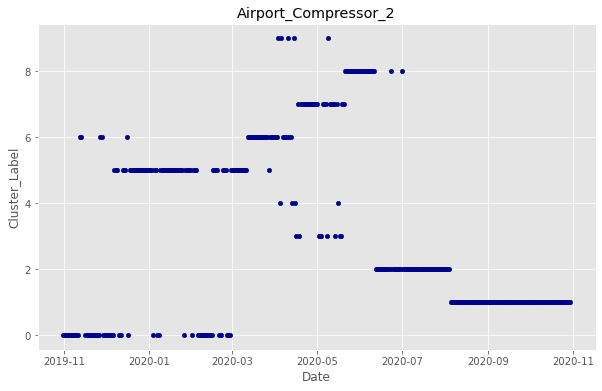

In [108]:
# Plot cluster labels grouped by day
df_day_fill.plot(kind='scatter', x='DateTime', y='Cluster_Label', figsize=(10, 6), color='darkblue')
plt.title(file_name)
plt.xlabel('Date')
plt.ylabel('Cluster_Label')
plt.show()